## Evaluating Model Performance and Hyperparameter Optimization for Wine Quality Classification: SVM, K-NN, Decision Tree, and Random Forest Machine Learning Models

The purpose of this project is to select the model with highest accuracy and model performance to classify Wines by quality. The comparison accross models is achieved by checking multiple Kernel types in Support Vector Machine (SVM), n_neighbors in K-nearest neighbours (K-NN) , maximum depth in Decision Tree (DT) and GridSearchCV hyperparameters tuning for Random Forest (RF) classification algorithms for Binary and Multi-class tasks. Model performance metrics includes F1, Precision, Recall and Confusion Matrix to assess which model result in the highest accuracy.

Data set description: Two datasets (quality for red and white wines) related to red and white variants of Portuguese wine are investigated. For more details consult: [Vinoverde](http://www.vinhoverde.pt/en/)  Available at: [ML datasest](https://archive.ics.uci.edu/ml/datasets/wine+quality)


###  Step 1. Import Required Libraries
Content for the "Import Required Libraries" section goes here.

In [99]:
import numpy as np 
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import string
import seaborn as sns
import scipy.stats as stats

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix,precision_score,recall_score,f1_score,matthews_corrcoef,accuracy_score,classification_report, ConfusionMatrixDisplay
from scipy.stats import shapiro, kstest, anderson, skew, kurtosis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from imblearn.over_sampling import SMOTE  
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.multiclass import OneVsRestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_blobs

### Step 2. Load and Pre-process Input Data for Binary Classes

In [2]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
#General info
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Feature Description

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Explanation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Fixed Acidity</td>
      <td>The amount of non-volatile acids (such as tartaric, malic, and succinic acid). These acids are important for flavor and stability, and can contribute to the wine's tartness or sourness. However, too much acidity can also make the wine taste sour or unbalanced. On the other hand, low levels of fixed acidity can make the wine taste flat or dull</td>
    </tr>
    <tr>
      <td>Volatile Acidity</td>
      <td>Taste measure, sign of winemaking quality. Higher – less control over taste</td>
    </tr>
      <tr>
      <td>Citric Acid</td>
      <td>Not typically present in significant amounts in wine, but it can be added during winemaking to adjust the wine's acidity or enhance its flavor profile. Citric acid can contribute a bright, citrusy note to the wine, which can be desirable in some styles of white wine, rosé, or sparkling wine</td>
    </tr>
      <tr>
      <td>Residual Sugar</td>
      <td>The amount of natural grape sugars that remain in the wine after fermentation is complete</td>
    </tr>
      <tr>
      <td>Chlorides</td>
      <td>The level of chlorides in wine can have an impact on the sensory characteristics of the wine, as well as its overall quality</td>
    </tr>
      <tr>
      <td>Free Sulfur Dioxide</td>
      <td>A type of sulfur dioxide that is present in wine. SO2 is added to wine during the winemaking process to protect the wine from oxidation and microbial spoilage</td>
    </tr>
      <tr>
      <td>Total Sulfur dioxide</td>
      <td>The sum of the free and bound forms of sulfur dioxide that are present in the wine</td>
    </tr>
      <tr>
      <td>density</td>
      <td>Density can be used to determine the alcohol content and sugar content</td>
    </tr>
      <tr>
      <td>pH</td>
      <td>pH is an important parameter that can affect the wine's stability, color, aroma, and taste. A wine with a low pH tends to be more refreshing, and age-worthy, while a wine with a high pH may be flatter, or dull</td>
    </tr>
      <tr>
      <td>Sulphates</td>
      <td>A chemical compound that occurs naturally at low levels during the process of wine fermentation. It is also added by many winemakers during the fermentation stage of winemaking to protect and preserve the wine's character, flavor, and color</td>   
    </tr>
      <tr>
      <td>Alcohol</td>
      <td>The average alcohol content of wine is about 12%</td>   
    </tr>
      <tr>
      <td>Quality</td>
      <td>Scores based on the combination of other features' measurement</td>   
  </tbody>
</table>

In [4]:
#Let's check how the data is distributed
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Gernal statistics
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Check size of data
wine.shape

(1599, 12)

In [7]:
#Check for missing data
wine.isna().sum() #checking for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing data or duplicating data. There are no issues with data consistency at this stage

In [8]:
#Check quality
wine.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [9]:
#checking latest values
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


#### Exploratory Data Analysis

In [10]:
# Get the order of quality based on frequency
quality_order = wine['quality'].value_counts().index
quality_order

Index([5, 6, 7, 4, 8, 3], dtype='int64', name='quality')

In [11]:
# Convert to a list
class_name = list(quality_order)
class_name

[5, 6, 7, 4, 8, 3]

In [12]:
# Get the count of each class name
count = wine['quality'].value_counts().values

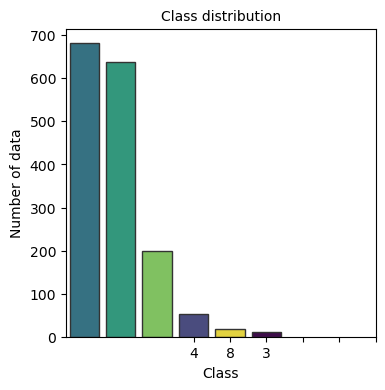

In [13]:
# Create a DataFrame to use with Seaborn
data = {'class_name': class_name, 'count': count}

# Set up the figure
plt.figure(figsize=(4, 4))

# Create the bar plot with different colors for each bar
sns.barplot(x='class_name', y='count', data=data, linewidth=1.0, err_kws={'color': '.2'}, edgecolor=".2", hue='class_name', palette="viridis", dodge=False,order=quality_order)

# Set the labels and title
plt.xlabel('Class', fontsize=10)
plt.ylabel('Number of data', fontsize=10)
plt.xticks(class_name, fontsize=10)
plt.title('Class distribution', fontsize=10)

# Remove the legend
plt.legend([],[], frameon=False)

# Show the plot
plt.show()

The original wine quality data has multiple categories 5, 6, 7, 4, 8,3. This can lead to an irregular distribution, where some quality scores are more frequent than others, and there might be gaps or uneven spacing between the scores. The aggregation of wine quality into broader categories changes the data from irregular to regular by simplifying the distribution, reducing noise, and balancing the classes. This transformation makes the data easier to work with and can lead to better model performance by focusing on the most important distinctions in the dataset

#### New created Binary class 

To make the classification outcomes a bit more direct, I create a new column named “good reviews” in the original dataset wine. “Good reviews equals class=2 when the quality is equal or above 6. 

In [14]:
#Create a new column called Review. This column will contain the values of 1 and 2. 
#1 - Bad
#2 - Good
#This will be split in the following way. 
#3-5 --> Bad
#6-8 --> Good
#Create an empty list called Reviews
reviews = []
for i in wine['quality']:
    if i >= 3 and i <= 5:
        reviews.append('1')
    elif i >= 6 and i <= 8:
        reviews.append('2')
wine['Reviews'] = reviews

In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  Reviews               1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


#### Check data irregularities

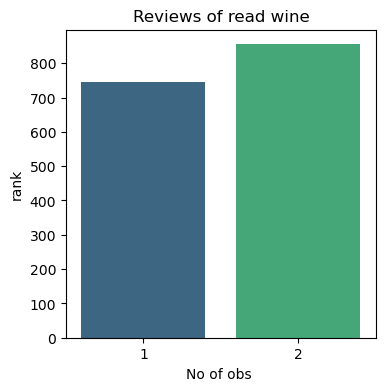

In [16]:
# Check class distribution reviews in a plot bar chart

# set figure size
plt.figure(figsize=(4, 4))

sns.countplot(data = wine, x = 'Reviews', hue='Reviews', palette="viridis", dodge=False)
plt.title('Reviews of read wine')
plt.xlabel('No of obs ')
plt.ylabel('rank');

Aggregating quality into broader categories Reviews help to mitigate class imbalance, creating more evenly distributed classes. This regularization can improve model performance by providing more balanced training data. By simplifying the target variable, the model is encouraged to focus on broader patterns, which can enhance its ability to generalize to new, unseen data (regularised for overfitting).

#### Check multicollinearity

In [17]:
#Check correlation across variables: Look for high correlations (close to 1 or -1) between pairs of features. High correlations suggest multicollinearity
wine.corr(method='pearson') #observing the correlation between the variables. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


Given that this dataset comprises multiple features of red wine, there may be significant correlations among them. Of particular interest is the correlation between "quality" and other features such as "alcohol," "pH," and "acidity." To provide a comprehensive overview of these relationships, a correlation matrix will be plotted to visualize all feature correlations

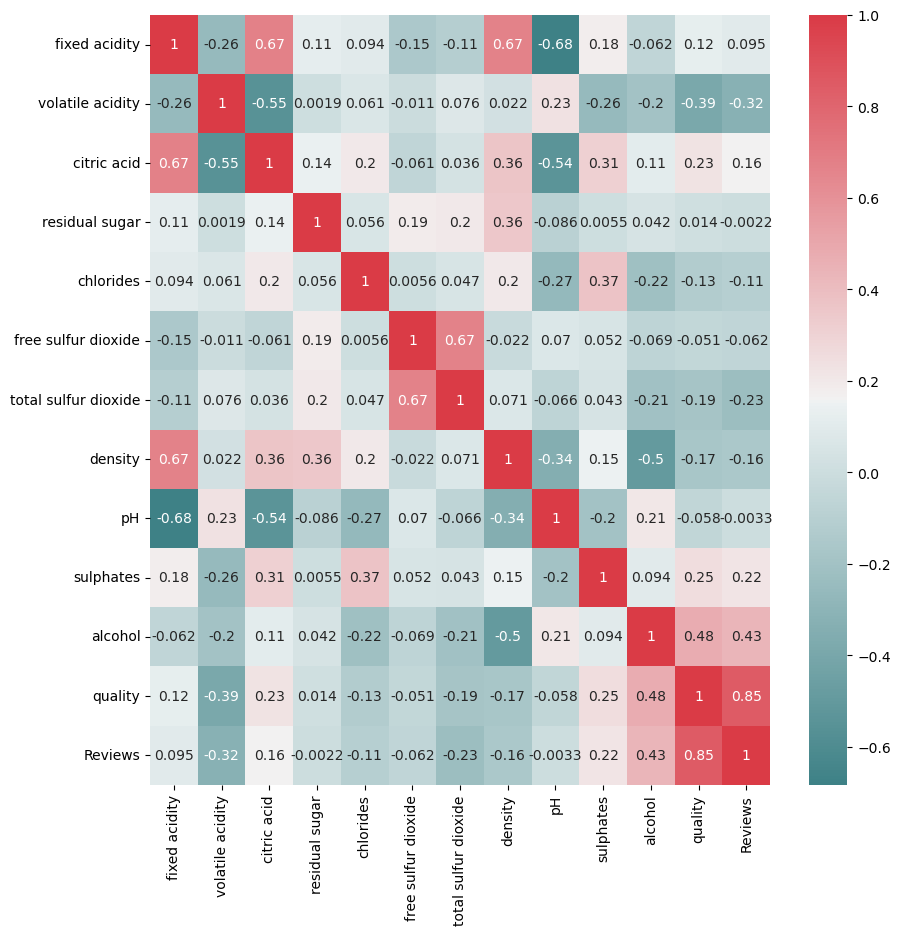

In [18]:
#Correlation plot
plt.figure(figsize=(10,10))
corr = wine.corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

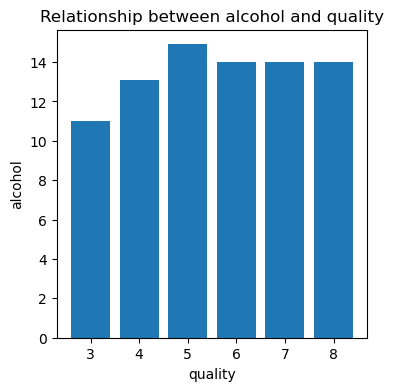

In [19]:
#Alcohol is highly correlated to quality
plt.figure(figsize=(4,4))
plt.bar(wine['quality'], wine['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

There seem to be traces of multicollinearity between some of the independent variables such as Fixed acidity and density (0.668),Free sulfur dioxide and total sulfur dioxide (0.668),Alcohol and quality (0.476),Quality and Reviews (0.848). This poses as a problem because we might not be able too see the individual effect of each variable since increase in one leads to increase in another.

In [20]:
#Checking multicolliniarity with Variance Inflation Factor (VIF):VIF quantifies how much the variance of a coefficient is inflated due to multicollinearity. 
#A VIF value above 10 (or sometimes 5) is typically considered an indicator of multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = wine.drop(columns=['Reviews'])  # Exclude target variables
X = pd.get_dummies(X)  # Convert categorical variables to dummy variables if necessary

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
pd.options.display.float_format = '{:.2f}'.format  
print(vif_data)

                 feature     VIF
0          fixed acidity   74.46
1       volatile acidity   17.96
2            citric acid    9.19
3         residual sugar    4.66
4              chlorides    6.64
5    free sulfur dioxide    6.46
6   total sulfur dioxide    6.61
7                density 1528.15
8                     pH 1078.17
9              sulphates   22.46
10               alcohol  147.62
11               quality   77.73


<Axes: title={'center': 'Correlation with quality'}>

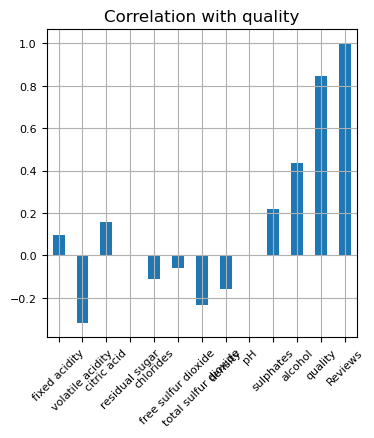

In [21]:
#Correlation with Quality with respect to attributes
wine.corrwith(wine.Reviews).plot.bar(
        figsize = (4, 4), title = "Correlation with quality", fontsize = 8,
        rot = 45, grid = True)

The suspected variables are indeed correlated. Particularly, Density and pH, Fixed acidity, Volatile acidity, Citric acid, Sulphates, and Alcohol. It is recomended to apply feature selection or removal, dimensionality reduction, regularisations

#### Check normality


While SVM, K-Nn and DT itself do not require normality as it is a non-parametric models, meaning they do not assume any particular distribution of the data,it could be important in some preprocessing steps or in the interpretation of other models used in conjunction with these models. It is useful for:
Feature Engineering: If you are performing feature scaling or transformation, understanding the distribution might help in choosing the right scaling technique
Comparing Models: If you are comparing SVM with other models that do assume normality, such as linear regression, you might want to check normality to better understand the performance differences
Outlier Detection: Extreme non-normality might indicate the presence of outliers or other data issues that could affect the SVM's performance, even though it is generally robust to such issues

In [22]:
#check whether features follow normality distributions
features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                 'pH', 'sulphates', 'alcohol']

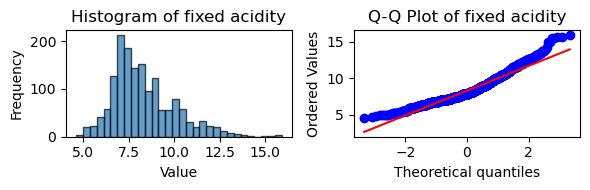

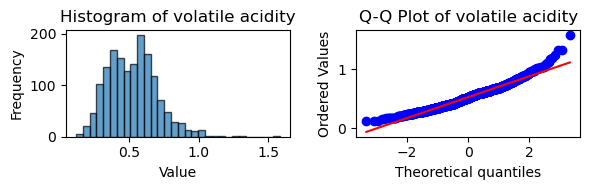

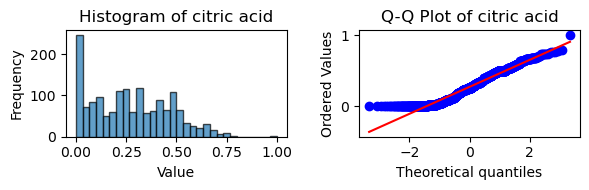

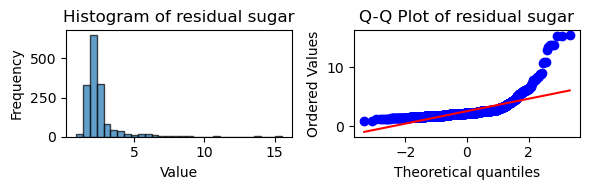

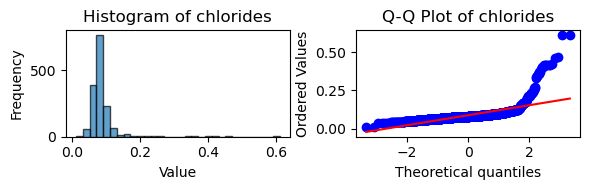

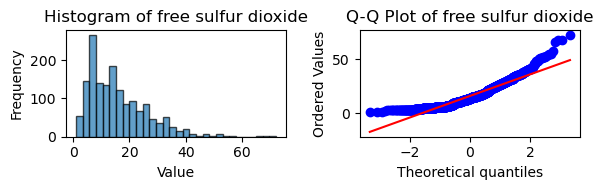

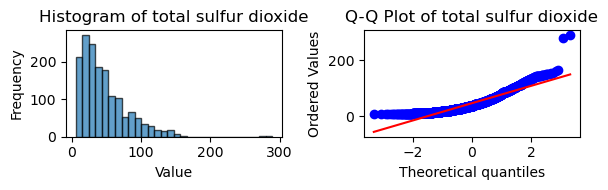

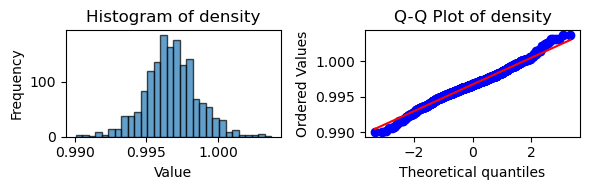

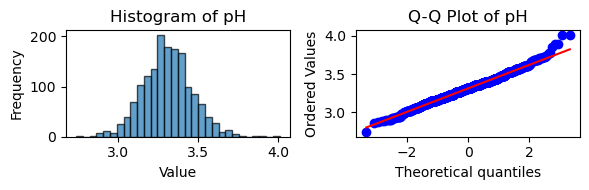

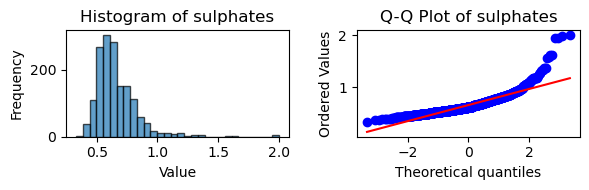

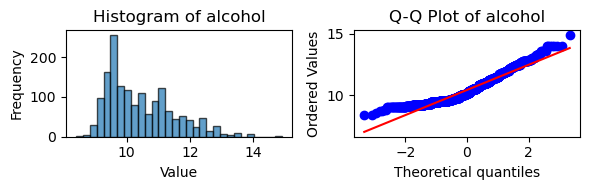

In [23]:
# Plot histograms and Q-Q plots for each feature
for feature in features:
    plt.figure(figsize=(6, 2))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(wine[feature].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(wine[feature].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')

    plt.tight_layout()
    plt.show()


The normality assumption in each feature has been checked and these are not normally distributed. However, StandardScaler I still used because the features are transformed to have mean of 0 and a standard deviation of 1 and is less sensitive to outliers. Althouugh features do not follow a normal distribution, these are standardised using StandardScaler which is commonly used technique to bring features to same scale due to its robustness and compatibility with many machine learning algorithm

### Step 3. Separate Training and Testing Data (Binary Class)

#### Split features and standarised data

In [24]:
#Split features and corresponding labels
x= wine.iloc[:,:11]
y = wine['Reviews']

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [26]:
#test_size = 0.25 means 75% data for training and remaining 25% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=42)

In [27]:
#Check shapes of split trains and test data
def check_shapes(x_train, x_test, y_train, y_test):
    print(f"x_train shape: {x_train.shape}")
    print(f"x_test shape: {x_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

# print the shapes
check_shapes(x_train, x_test, y_train, y_test)

x_train shape: (1199, 11)
x_test shape: (400, 11)
y_train shape: (1199,)
y_test shape: (400,)


In [28]:
#Scaled numerical values- Binary class
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


### Step 4. Evaluate the Performances of the SVM Algorithm (Binary Classes)

#### Assessing different Kernel types

In [29]:
#Create SVM linear
svm_linear = SVC(gamma='auto', kernel='linear', probability=True, random_state=42)

#Train the model using the training sets
svm_linear.fit(X_train_scaled, y_train) 

#Predict the response for test dataset
y_pred_linear = svm_linear.predict(X_test_scaled)

# Model Accuracy, how often is the classifier correct?
accuracy_linear = metrics.accuracy_score(y_pred_linear, y_test) * 100
precision_linear_weighted = precision_score(y_test, y_pred_linear, average='weighted')
recall_linear_weighted = recall_score(y_test, y_pred_linear, average='weighted')
f1_linear_weighted = f1_score(y_test, y_pred_linear, average='weighted')

In [30]:
#Create SVM rbf
svm_rbf = SVC(gamma='auto', kernel='rbf', probability=True,random_state=42)

#Train the model using the training sets
svm_rbf .fit(X_train_scaled, y_train) 

#Predict the response for test dataset
y_pred_rbf  = svm_rbf .predict(X_test_scaled)

# Model Accuracy, how often is the classifier correct?
accuracy_rbf  = metrics.accuracy_score(y_pred_rbf , y_test) * 100
precision_rbf_weighted = precision_score(y_test, y_pred_rbf , average='weighted')
recall_rbf_weighted = recall_score(y_test, y_pred_rbf , average='weighted')
f1_rbf_weighted = f1_score(y_test, y_pred_rbf , average='weighted')

#### Evaluating Model Performance Metrics

In [31]:
# Create a summary DataFrame
results = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score (Weighted)','Precision (Weighted)', 'Recall (Weighted)'],
    'SVM Linear': [accuracy_linear, precision_linear_weighted, recall_linear_weighted, f1_linear_weighted],
    'SVM RBF': [accuracy_rbf,precision_rbf_weighted, recall_rbf_weighted, f1_rbf_weighted]
})

print(results)

                 Metric  SVM Linear  SVM RBF
0              Accuracy       72.50    76.00
1   F1 Score (Weighted)        0.73     0.76
2  Precision (Weighted)        0.72     0.76
3     Recall (Weighted)        0.73     0.76


#### Confusion Matrix for the SVM Algorithm (Binary Classes)

Text(0.5, 1.0, 'SVM Kernel=linear, Confusion Matrix for Binary Classes')

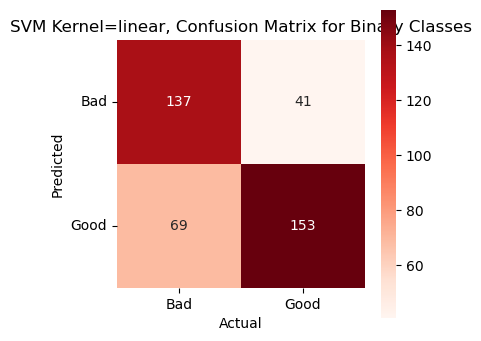

In [32]:
#Create SVM Model- kernel='linear', C=1 (default)
plt.figure(figsize=(4, 4))

mat = confusion_matrix(y_test, y_pred_linear )

axes = sns.heatmap(mat,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.Reds)

class_labels = ['Bad', 'Good']

axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')

tick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=0)

axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels,rotation=0)

axes.set_title('SVM Kernel=linear, Confusion Matrix for Binary Classes')

Text(0.5, 1.0, 'SVM Kernel=rbf, gamma=auto, Confusion Matrix for Binary Classes')

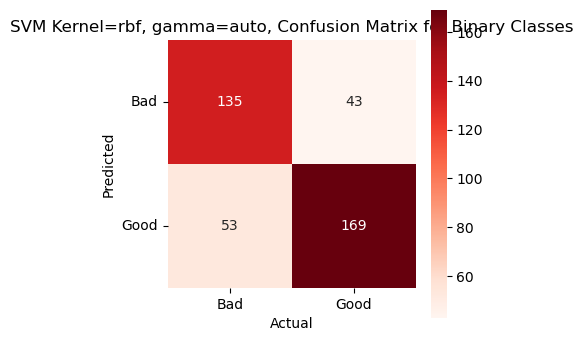

In [33]:
#Create SVM Model- kernel='rbf', C=1 dafault, gamma='auto'
plt.figure(figsize=(4, 4))

mat = confusion_matrix(y_test,  y_pred_rbf)

axes = sns.heatmap(mat,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.Reds)

class_labels = ['Bad', 'Good']

axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')

tick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(tick_marks)
axes.set_xticklabels(class_labels,rotation=0)

axes.set_yticks(tick_marks)
axes.set_yticklabels(class_labels,rotation=0)

axes.set_title('SVM Kernel=rbf, gamma=auto, Confusion Matrix for Binary Classes')

Selecting the most optimal gamma which control the influence of a single training example affecting the decision boundary's shape. It controls the width of the Gaussian function used in the RBF kernel. The lower gamma is, the smoother decision boundary- good for avoiding overfitting but might result in underfitting. The higher the value, the more complex and sensitivity decision boundary is- could lead to overfitting. In this example was selected as gamma="auto". the value is gamm=1/nfeatures=1/13=0.07. 

The lower C (parameter controls trade-off between achieving a low training error -biases- and low testing error -variance) is, the decision boundary is simpler and might lead to underfitting. The higher C, the narrower decision region it might lead to overfitting.

The SVM models using Kernel and rbf were estimated separately before. We are going to combine both estimation using pipeline to ensure that all the preprocessing steps are applied consistently during the hyperparameter tuning process.


#### Hypertunning gamma parameter

In [34]:
#Let's apply grid search to find the optimal gamma using grid search. We will keep with the default value of C (C=1) to isolate the influence of gamma in the RBF kernel
# Create the pipeline
pipe_svc = make_pipeline(StandardScaler(), SVC())

# Model performance metrics to evaluate
scorer = make_scorer(f1_score, average='weighted')  # Weighted F1 score

# Set Parameter grid
param_grid = [
    {
        'svc__C': [1.0],
        'svc__kernel': ['linear']
    },
    {
        'svc__C': [1.0],
        'svc__gamma': [0.2,0.1,0.015,0.07,0.11,0.015,0.004],
        'svc__kernel': ['rbf']
    }
]

# Perform grid search
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)

# Fit GridSearchCV
gs.fit(x_train, y_train)  # Ensure X_train and y_train are correctly preprocessed

# Check best score and parameters
print("Best F1 Score:", gs.best_score_)
print("Best Parameters:", gs.best_params_)

Best F1 Score: 0.7704153147536554
Best Parameters: {'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [35]:
#Create SVM Model- kernel='rbf' and gamma=0.1
#kernel='linear' or kernel='rbf'  or kernel='poly' 
# Ensure reproducibility
random_state = 42

# SVM Model
svm_rbf_3 = SVC(C=1,gamma=0.1, kernel='rbf', probability=True, random_state=random_state)
#Train the model using the training sets
svm_rbf_3.fit(X_train_scaled, y_train) 
#Predict the response for test dataset
y_pred_rbf_3 = svm_rbf_3.predict(X_test_scaled)

# Model Accuracy, how often is the classifier correct?
precision_rbf_3 = metrics.accuracy_score(y_pred_rbf_3 , y_test) * 100
print("Accuracy with SVM (Binary): {0:.2f}%".format(precision_rbf_3))

Accuracy with SVM (Binary): 76.00%


In [36]:
# Evaluate RBF Kernel and gamma=0.1
print("RBF Kernel Performance:")
pre_val_rbf_3 = precision_score(y_true=y_test, y_pred=y_pred_rbf_3, average='weighted')
rec_val_rbf_3 = recall_score(y_true=y_test, y_pred=y_pred_rbf_3, average='weighted')
f1_val_rbf_3 = f1_score(y_true=y_test, y_pred=y_pred_rbf_3, average='weighted')

print(f'Precision: {pre_val_rbf_3:.3f}')
print(f'Recall: {rec_val_rbf_3:.3f}')
print(f'F1: {f1_val_rbf_3:.3f}')


RBF Kernel Performance:
Precision: 0.762
Recall: 0.760
F1: 0.761


The identical performance metrics (precision, recall, F1 score) bserved when using both gamma='auto' and gamma=0.1 after grid search suggest that in this specific case, the model's predictions on the test set did not significantly change when adjusted the gamma parameter

The stability in metrics across SVM binary rfb models suggests that the decision boundary and resulting classifications on the test set remain very similar under both parameter settings. However, using the gamma=0.1 setting aligns with the grid search results and ensures consistency in the modelling process. This parameter was selected based on a systematic search over possible values and should be preferred when deploying the model or making predictions on new data.  This setting was determined to be optimal through cross-validation, which is a more robust approach to parameter tuning. Even though your test set results were similar for both gamma='auto' and gamma=0.1, the cross-validation process suggests that gamma=0.1 is likely the better choice for generalization.

#### AUC and ROC SVM

AUC and ROC curve evaluations is also included to provide a more complete picture of the model's performance

AUC and ROC curve evaluations is also included to provide a more complete picture of the model's performance, particularly in understanding how well it discriminates between classes across different decision thresholds. The selected SVM model considering Positive Class =1 (Bad reviews) and Negative Class=2 (Good reviews) . Usually to determine which one is the positive class is based on what outcome is more relevant for the business to know. In this case is Bad reviews so the positive class= Bad reviews is the class where ROC and AUC is evaluated

##### Class 1= Bad reviews

AUC with SVM (RBF Kernel, gamma=0.1) for class 1: 0.83


<Figure size 400x400 with 0 Axes>

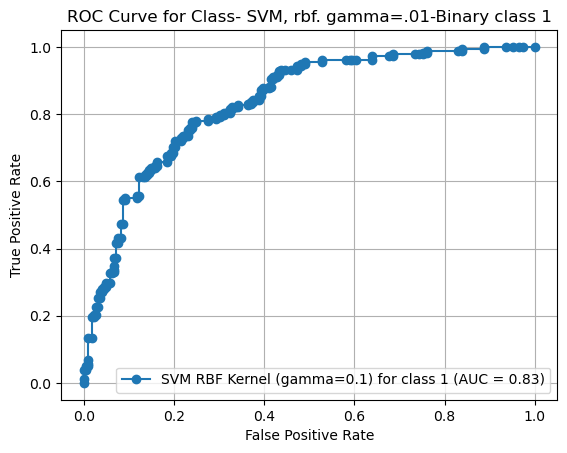

In [37]:
# Ensure reproducibility
plt.figure(figsize=(4, 4))

# SVM Model with RBF kernel
svm_rbf_3 = SVC(C=1, gamma=0.1, kernel='rbf', probability=True, random_state=42)

# Train the model using the training set
svm_rbf_3.fit(X_train_scaled, y_train)

# Predict the response for the test dataset
y_pred_rbf_3 = svm_rbf_3.predict(X_test_scaled)
y_pred_prob_rbf_3 = svm_rbf_3.predict_proba(X_test_scaled)  # Probability estimates for all classes

# Choose the class of interest (e.g., class '1' or class '2')
class_of_interest = '1'

# Map class labels to indices
class_labels = sorted(np.unique(y_train))  # Get all unique class labels
class_to_index = {label: idx for idx, label in enumerate(class_labels)}  # Create a mapping from class labels to indices

# Ensure the class_of_interest is valid
if class_of_interest not in class_to_index:
    raise ValueError(f"Class {class_of_interest} is not in the training labels")

class_index = class_to_index[class_of_interest]

# Convert y_test to binary for the class of interest
y_test_binary = (y_test == class_of_interest).astype(int)

# Get the predicted probabilities for the class of interest
y_pred_prob_class = y_pred_prob_rbf_3[:, class_index]

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob_class, pos_label=1)
auc_rbf_3 = roc_auc_score(y_test_binary, y_pred_prob_class)

# Print the AUC
print(f'AUC with SVM (RBF Kernel, gamma=0.1) for class {class_of_interest}: {auc_rbf_3:.2f}')

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, marker='o', label=f'SVM RBF Kernel (gamma=0.1) for class {class_of_interest} (AUC = {auc_rbf_3:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Class- SVM, rbf. gamma=.01-Binary class {class_of_interest}')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Step 5. Evaluate the Performances of the K-NN Algorithm (Binary Classes)

#### Assesing different N-neighbours

A loop to iterate over different values for n_neighbors is used as it is a useful technique for evaluating and tuning K-NN models. This iterative approach helps in understanding how the performance of the model varies with different configurations and allows you to select the best number of neighbors for your specific problem

In [38]:
# Define the range of neighbors to test
neighbors_range = range(2, 11)  # n_neighbors from 2 to 10

# Loop through each value of n_neighbors
for n_neighbors in neighbors_range:
    # Create KNN model with the current number of neighbors
    knn_n_b = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model using the training set
    knn_n_b.fit(X_train_scaled, y_train)
    
    # Predict the response for the test dataset
    y_pred_knn_n_b = knn_n_b.predict(X_test_scaled)
    
    # Calculate model accuracy
    accuracy_knn_n_b = metrics.accuracy_score(y_test, y_pred_knn_n_b) * 100
    
    # Print the accuracy
    print(f"Accuracy with K-NN ({n_neighbors} neighbors): {accuracy_knn_n_b:.2f}%")

Accuracy with K-NN (2 neighbors): 69.75%
Accuracy with K-NN (3 neighbors): 71.25%
Accuracy with K-NN (4 neighbors): 69.50%
Accuracy with K-NN (5 neighbors): 70.25%
Accuracy with K-NN (6 neighbors): 68.75%
Accuracy with K-NN (7 neighbors): 68.75%
Accuracy with K-NN (8 neighbors): 71.50%
Accuracy with K-NN (9 neighbors): 71.50%
Accuracy with K-NN (10 neighbors): 72.50%


#### Evaluating Model Performance Metrics

In [39]:
# Define the range of neighbors to test
neighbors_range = range(2, 11)  # n_neighbors from 2 to 10

# Iterate over the range of neighbors
for n_neighbors in neighbors_range:
    # Create KNN model with the current number of neighbors
    knn_n_b = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model using the training set
    knn_n_b.fit(X_train_scaled, y_train)
    
    # Predict the response for the test dataset
    y_pred_knn_n_b = knn_n_b.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy_knn_n_b = metrics.accuracy_score(y_test, y_pred_knn_n_b) * 100
    precision_knn_n_b = precision_score(y_test, y_pred_knn_n_b, average='weighted')
    recall_knn_n_b = recall_score(y_test, y_pred_knn_n_b, average='weighted')
    f1_knn_n_b = f1_score(y_test, y_pred_knn_n_b, average='weighted')
   
    
    # Print the metrics
    print(f"Performance with K-NN ({n_neighbors} neighbors):")
    print(f"Accuracy: {accuracy_knn_n_b:.2f}%")
    print(f"Precision: {precision_knn_n_b:.3f}")
    print(f"Recall: {recall_knn_n_b:.3f}")
    print(f"F1 Score: {f1_knn_n_b:.3f}")
    print()


Performance with K-NN (2 neighbors):
Accuracy: 69.75%
Precision: 0.719
Recall: 0.698
F1 Score: 0.697

Performance with K-NN (3 neighbors):
Accuracy: 71.25%
Precision: 0.712
Recall: 0.713
F1 Score: 0.710

Performance with K-NN (4 neighbors):
Accuracy: 69.50%
Precision: 0.701
Recall: 0.695
F1 Score: 0.696

Performance with K-NN (5 neighbors):
Accuracy: 70.25%
Precision: 0.701
Recall: 0.703
F1 Score: 0.701

Performance with K-NN (6 neighbors):
Accuracy: 68.75%
Precision: 0.691
Recall: 0.688
F1 Score: 0.688

Performance with K-NN (7 neighbors):
Accuracy: 68.75%
Precision: 0.686
Recall: 0.688
F1 Score: 0.685

Performance with K-NN (8 neighbors):
Accuracy: 71.50%
Precision: 0.716
Recall: 0.715
F1 Score: 0.715

Performance with K-NN (9 neighbors):
Accuracy: 71.50%
Precision: 0.714
Recall: 0.715
F1 Score: 0.712

Performance with K-NN (10 neighbors):
Accuracy: 72.50%
Precision: 0.728
Recall: 0.725
F1 Score: 0.726



#### AUC and ROC KNN

##### Class 1= Positive Class, Bad Reviews

AUC with K-NN (2 neighbors) for class 1: 0.76


<Figure size 400x400 with 0 Axes>

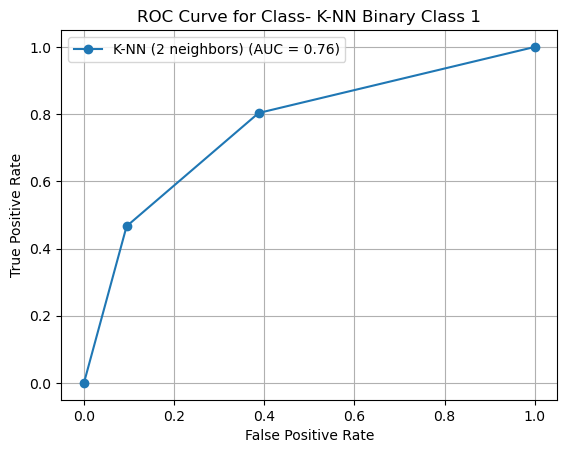

AUC with K-NN (3 neighbors) for class 1: 0.76


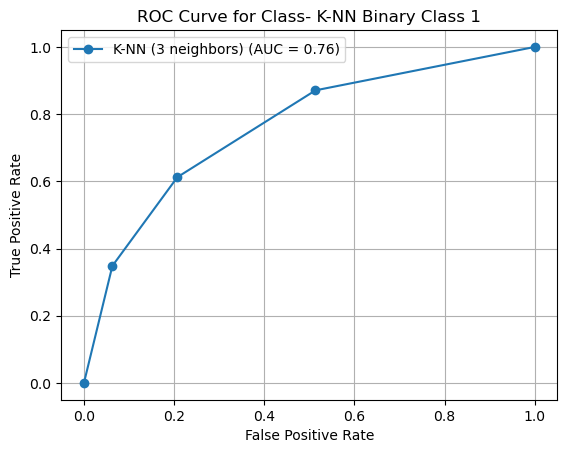

AUC with K-NN (4 neighbors) for class 1: 0.77


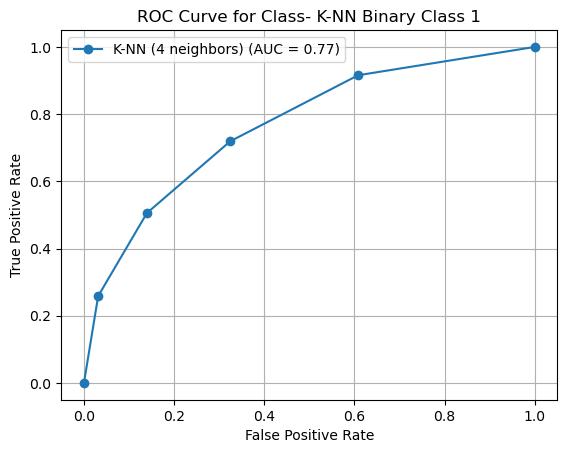

AUC with K-NN (5 neighbors) for class 1: 0.77


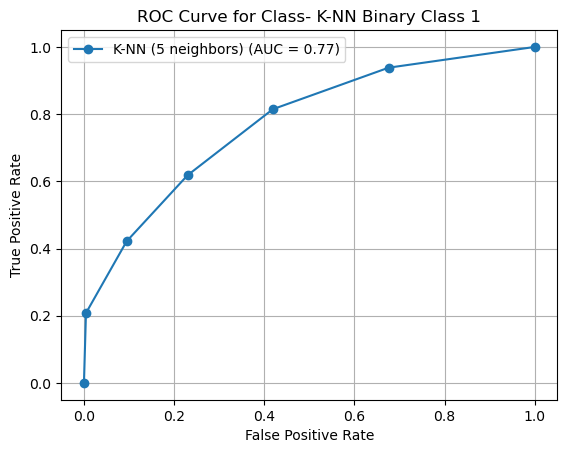

AUC with K-NN (6 neighbors) for class 1: 0.77


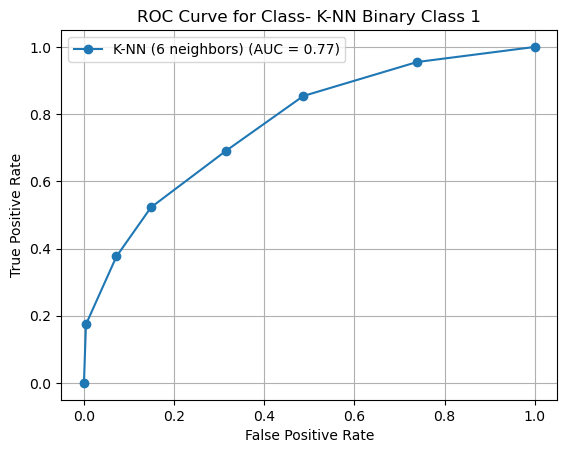

AUC with K-NN (7 neighbors) for class 1: 0.77


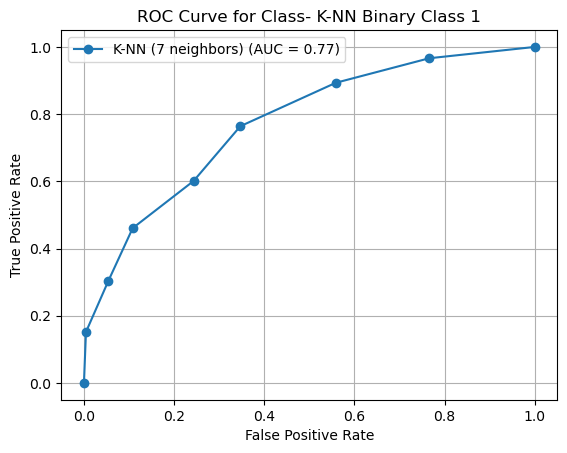

AUC with K-NN (8 neighbors) for class 1: 0.78


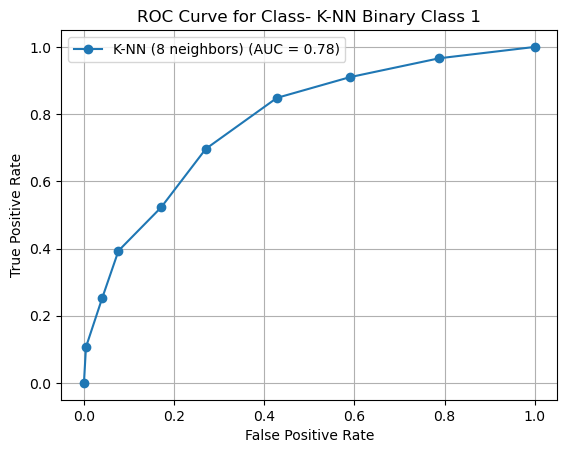

AUC with K-NN (9 neighbors) for class 1: 0.79


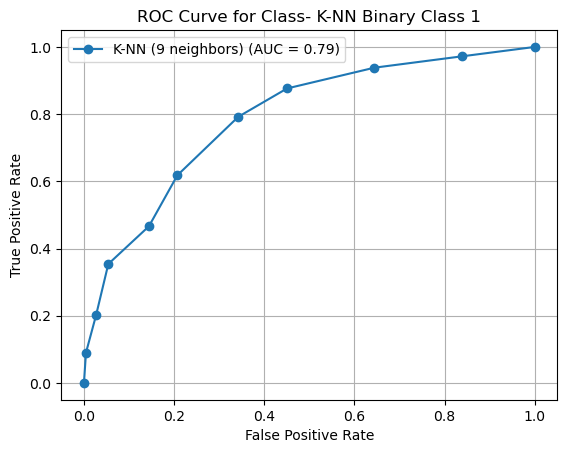

In [40]:
# Define the range of neighbors to test
plt.figure(figsize=(4, 4))

neighbors_range = range(2, 10)  # n_neighbors from 2 to 10

# Define the class of interest (e.g., '1')
class_of_interest = '1'

# Get the unique class labels
class_labels = sorted(np.unique(y_train))
class_to_index = {label: idx for idx, label in enumerate(class_labels)}

# Ensure the class_of_interest is valid
if class_of_interest not in class_to_index:
    raise ValueError(f"Class {class_of_interest} is not in the training labels")

class_index = class_to_index[class_of_interest]

# Iterate over the range of neighbors
for n_neighbors in neighbors_range:
    # Create KNN model with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model using the training set
    knn.fit(X_train_scaled, y_train)
    
    # Predict the response for the test dataset
    y_pred_knn = knn.predict(X_test_scaled)
    y_pred_prob_knn = knn.predict_proba(X_test_scaled)[:, class_index]  # Probability estimates for the class of interest
    
    # Convert y_test to binary for the class of interest
    y_test_binary = (y_test == class_of_interest).astype(int)
    
    # Calculate ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob_knn, pos_label=1)
    auc_knn = roc_auc_score(y_test_binary, y_pred_prob_knn)
    
    # Print the AUC
    print(f'AUC with K-NN ({n_neighbors} neighbors) for class {class_of_interest}: {auc_knn:.2f}')
    
    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, marker='o', label=f'K-NN ({n_neighbors} neighbors) (AUC = {auc_knn:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class- K-NN Binary Class {class_of_interest}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

The AUC for class 1 is 0.78 which indicates the model has the ability to discriminate the positive and negative classes. The model could potentially be improved if various factors such as class imbalance (more volume to class=2 (Good reviews) and Bad reviews class=2), noise in the dataset, model configuration, type of model selected is evaluated.

#### Confusion Matrix for the K-NN Algorithm (Binary Classes)


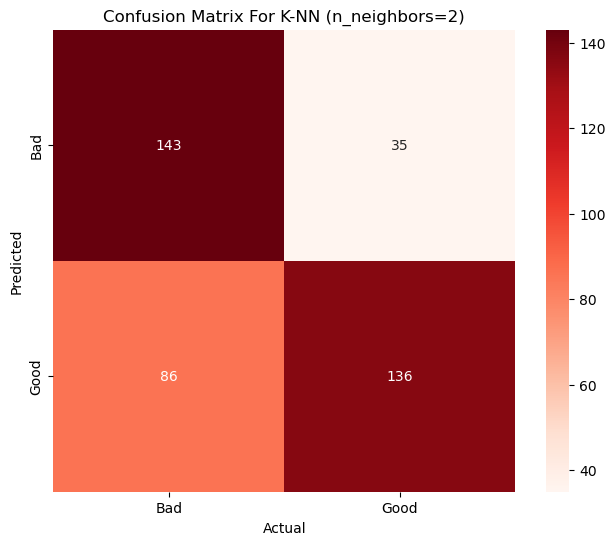

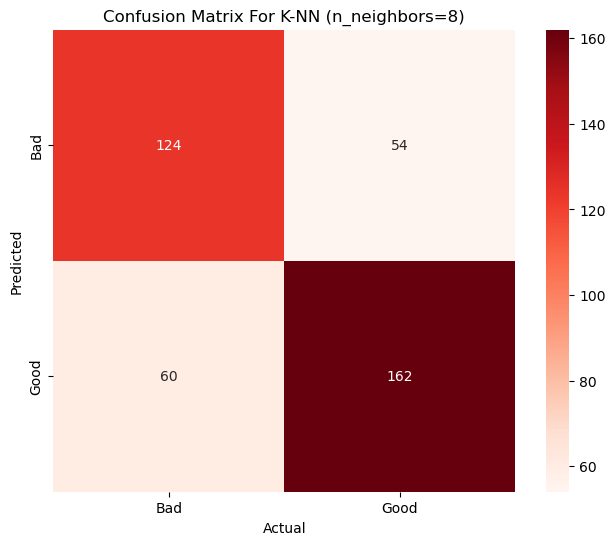

In [41]:
# Define the specific neighbors to test
specific_neighbors = [2, 8]

# Iterate over the specific neighbors
for n_neighbors in specific_neighbors:
    # Create KNN model with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model using the training set
    knn.fit(X_train_scaled, y_train)
    
    # Predict the response for the test dataset
    y_pred_knn = knn.predict(X_test_scaled)
    
    # Compute the confusion matrix
    mat = confusion_matrix(y_test, y_pred_knn)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    axes = sns.heatmap(mat, square=True, annot=True, fmt='d',
                       cbar=True, cmap=plt.cm.Reds, 
                       xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
    
    # Set labels
    axes.set_xlabel('Actual')
    axes.set_ylabel('Predicted')
    axes.set_title(f'Confusion Matrix For K-NN (n_neighbors={n_neighbors})')
    
    # Show the plot
    plt.show()



### Step 6. Evaluate the Performances of the Decision Tree (DT) Algorithm (Binary Classes)

#### Assessing different Max_Depth

In [42]:
def evaluate_decision_tree(X_train_scaled, y_train, X_test_scaled_, y_test):
    max_depths = [None, 3]  # Default max_depth (None) and max_depth=3
    
    results = {}
    
    for max_depth in max_depths:
        # Create Decision Tree model with the current max_depth
        tree = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
        
        # Train the model
        tree.fit(X_train_scaled, y_train)
        
        # Predict the response for the test dataset
        y_pred_t = tree.predict(X_test_scaled)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred_t) * 100
        
        # Store the results
        depth_label = f'MAX_DEPTH={max_depth if max_depth is not None else "default"}'
        results[depth_label] = accuracy
        
        # Print the results
        print(f'Accuracy for Decision Tree with {depth_label}: {accuracy:.2f}%')
    
    return results

# Evaluate DT
results = evaluate_decision_tree(X_train_scaled, y_train, X_test_scaled, y_test)


Accuracy for Decision Tree with MAX_DEPTH=default: 72.00%
Accuracy for Decision Tree with MAX_DEPTH=3: 70.50%


#### Plot DT

Accuracy with Decision Tree (max_depth=2): 66.00%


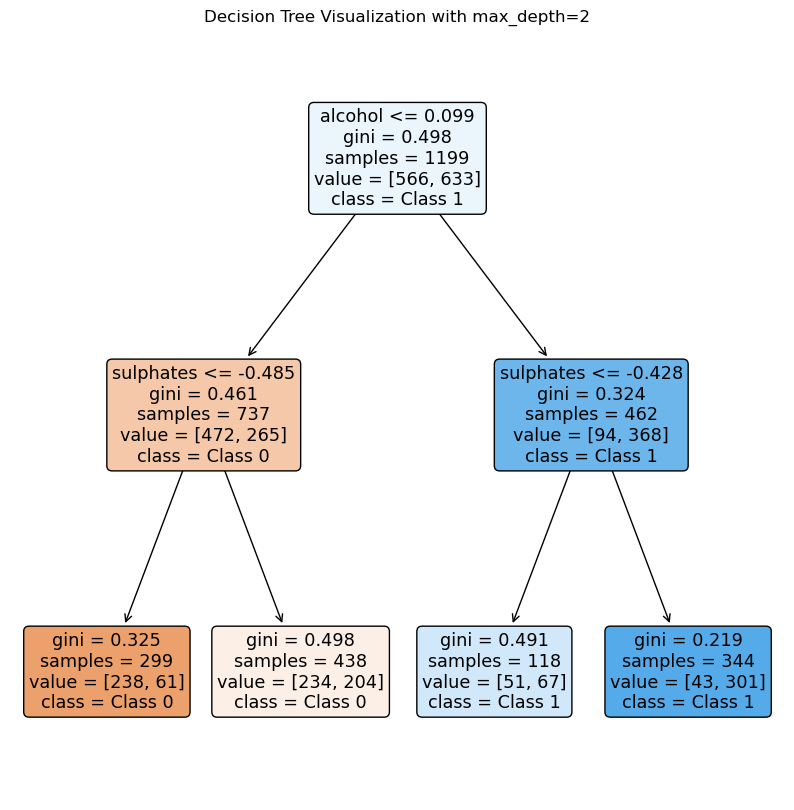

Accuracy with Decision Tree (max_depth=3): 70.50%


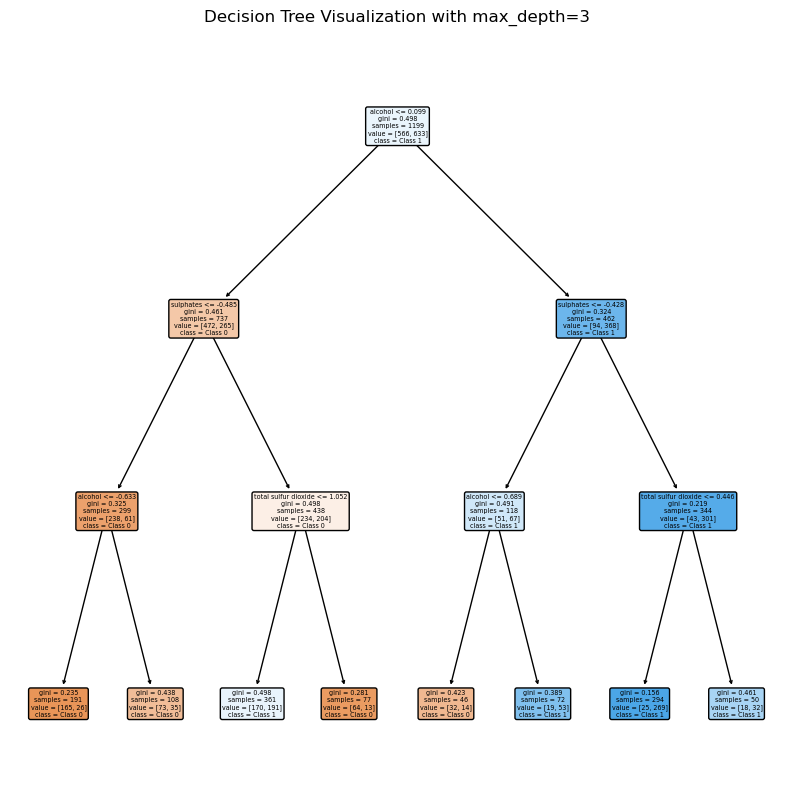

Accuracy with Decision Tree (max_depth=4): 71.50%


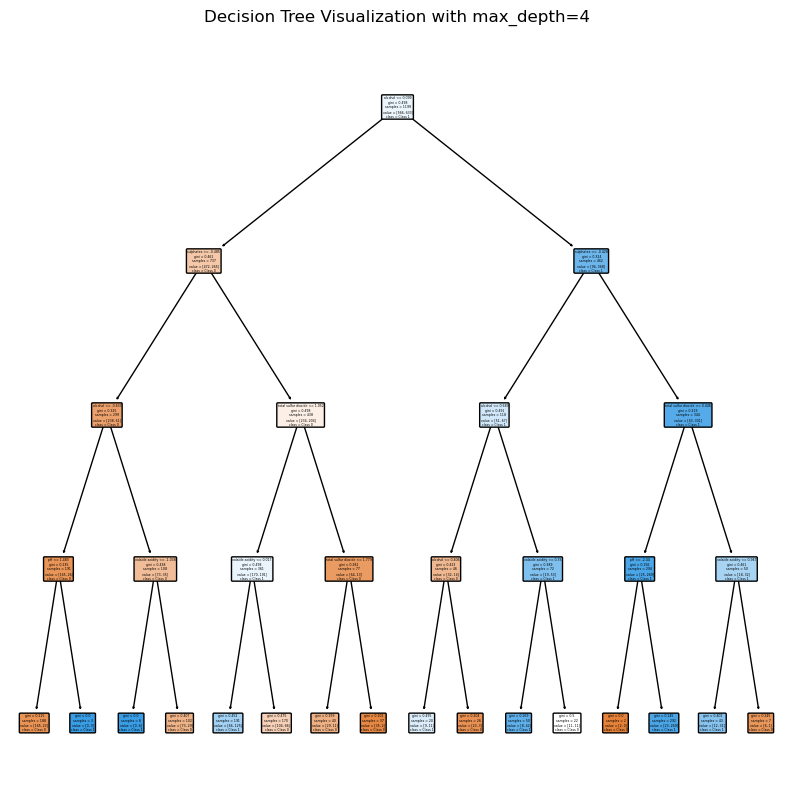

In [44]:
#Plot DT 
# List of feature names (replace with your actual feature names)

feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 
    'residual sugar', 'chlorides', 'free sulfur dioxide', 
    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]

# Train and visualize Decision Trees with different max_depth values
for depth in [2, 3, 4]:
    # Create the Decision Tree model with the specified max_depth
    tree = DecisionTreeClassifier(random_state=42, max_depth=depth)
    
    # Train the model
    tree.fit(X_train_scaled, y_train)
    
    # Predict the response for the test dataset
    y_pred_t = tree.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_t) * 100
    print(f"Accuracy with Decision Tree (max_depth={depth}): {accuracy:.2f}%")
    
    # Plot the Decision Tree
    plt.figure(figsize=(10,10))
    plot_tree(tree, feature_names=feature_names, class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
    plt.title(f'Decision Tree Visualization with max_depth={depth}')
    plt.show()


#### Evaluating Model Performance Metrics

In [45]:
def evaluate_decision_tree_metrics(X_train_scaled, y_train, X_test_scaled, y_test):
    max_depths = [None, 3]  # Default max_depth (None) and max_depth=3
    
    for max_depth in max_depths:
        # Create Decision Tree model with the current max_depth
        tree = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
        
        # Train the model
        tree.fit(X_train_scaled, y_train)
        
        # Predict the response for the test dataset
        y_pred_t = tree.predict(X_test_scaled)
        
        # Calculate various metrics
        accuracy_DT_b = accuracy_score(y_test, y_pred_t)
        precision_DT_b = precision_score(y_test, y_pred_t, average='weighted')
        recall_DT_b = recall_score(y_test, y_pred_t, average='weighted')
        f1_DT_b = f1_score(y_test, y_pred_t, average='weighted')
      
        
        # Print the results
        depth_label = f'MAX_DEPTH={max_depth if max_depth is not None else "default"}'
        print(f'\nPerformance Metrics for Decision Tree with {depth_label}:')
        print(f'Accuracy: {accuracy_DT_b * 100:.2f}%')
        print(f'Precision: {precision_DT_b:.3f}')
        print(f'Recall: {recall_DT_b:.3f}')
        print(f'F1: {f1_DT_b:.3f}')
        
# Evaluate DT
evaluate_decision_tree_metrics (X_train_scaled, y_train, X_test_scaled, y_test)



Performance Metrics for Decision Tree with MAX_DEPTH=default:
Accuracy: 72.00%
Precision: 0.719
Recall: 0.720
F1: 0.720

Performance Metrics for Decision Tree with MAX_DEPTH=3:
Accuracy: 70.50%
Precision: 0.710
Recall: 0.705
F1: 0.696


#### Confusion Matrix for the DT Algorithm (Binary Classes)


<Figure size 400x400 with 0 Axes>

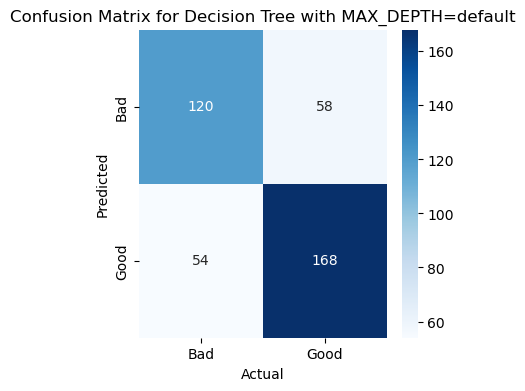

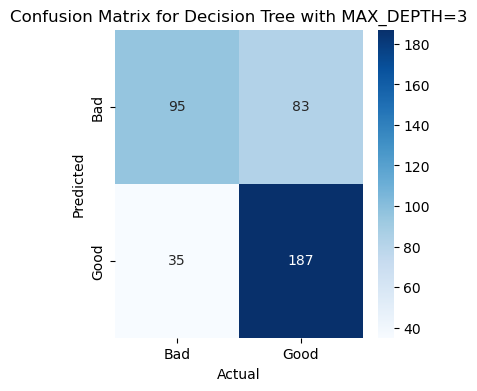

In [46]:
def evaluate_decision_tree_with_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test):
    max_depths = [None, 3]  # Default max_depth (None) and max_depth=3
    plt.figure(figsize=(4, 4))
    
    for max_depth in max_depths:
        # Create Decision Tree model with the current max_depth
        tree = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
        
        # Train the model
        tree.fit(X_train_scaled, y_train)
        
        # Predict the response for the test dataset
        y_pred_t = tree.predict(X_test_scaled)
        
        # Calculate various metrics
        precision = precision_score(y_test, y_pred_t, average='weighted')
        recall = recall_score(y_test, y_pred_t, average='weighted')
        f1 = f1_score(y_test, y_pred_t, average='weighted')
      
        
        # Print the results
        depth_label = f'MAX_DEPTH={max_depth if max_depth is not None else "default"}'
           
        # Generate and display the confusion matrix
        conf_mat = confusion_matrix(y_test, y_pred_t )
        plt.figure(figsize=(4, 4))
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap=plt.cm.Blues, 
                    xticklabels=['Bad', 'Good'], 
                    yticklabels=['Bad', 'Good'])
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Confusion Matrix for Decision Tree with {depth_label}')
        plt.show()

# Evaluate DT
evaluate_decision_tree_with_confusion_matrix(X_train_scaled, y_train, X_test_scaled, y_test)


When the dataset is small or the classes are well-separated, changing the max_depth might not significantly impact the classifier's performance, resulting in the same confusion matrix

#### AUC and ROC : Class=1, Good Reviews


AUC with Decision Tree (max_depth=None) for class 1: 0.72


<Figure size 400x400 with 0 Axes>

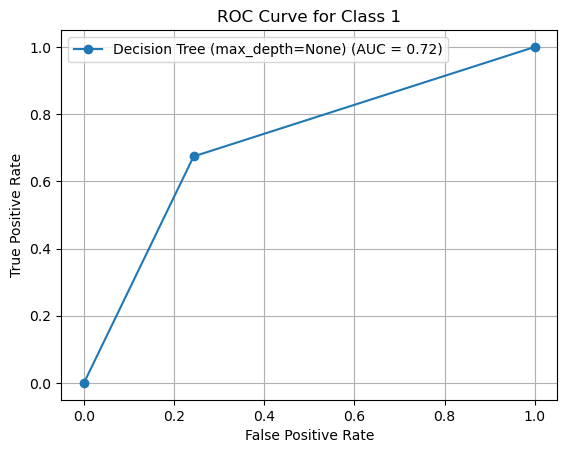

AUC with Decision Tree (max_depth=3) for class 1: 0.76


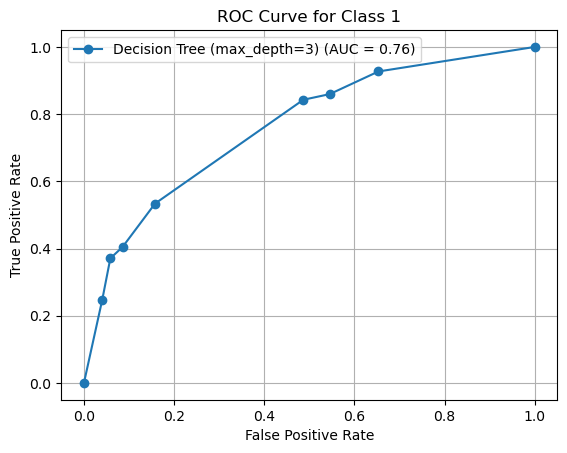

In [47]:
def evaluate_decision_tree_metrics(X_train_scaled, y_train, X_test_scaled, y_test, class_of_interest='1'):
    max_depths = [None, 3]  # Default max_depth (None) and max_depth=3
    
    plt.figure(figsize=(4, 4))
    # Get the unique class labels
    class_labels = sorted(np.unique(y_train))
    class_to_index = {label: idx for idx, label in enumerate(class_labels)}

    # Ensure the class_of_interest is valid
    if class_of_interest not in class_to_index:
        raise ValueError(f"Class {class_of_interest} is not in the training labels")

    class_index = class_to_index[class_of_interest]

    for max_depth in max_depths:
        # Create Decision Tree model with the current max_depth
        tree = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
        
        # Train the model
        tree.fit(X_train_scaled, y_train)
        
        # Predict the response for the test dataset
        y_pred_prob_t = tree.predict_proba(X_test_scaled)[:, class_index]  # Probability estimates for the class of interest
        
        # Convert y_test to binary for the class of interest
        y_test_binary = (y_test == class_of_interest).astype(int)
        
        # Calculate ROC Curve and AUC
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob_t, pos_label=1)
        auc_t = roc_auc_score(y_test_binary, y_pred_prob_t)
        
        # Print the AUC
        print(f'AUC with Decision Tree (max_depth={max_depth}) for class {class_of_interest}: {auc_t:.2f}')
        
        # Plot ROC Curve
        plt.figure()
        plt.plot(fpr, tpr, marker='o', label=f'Decision Tree (max_depth={max_depth}) (AUC = {auc_t:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for Class {class_of_interest}')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

# Evaluate DT
evaluate_decision_tree_metrics(X_train_scaled, y_train, X_test_scaled, y_test, class_of_interest='1')


### Step 7. Load and Pre-process Input Data for Multi-class Task

#### Split features and standarised data

In [48]:
#Loading dataset
wineMC = pd.read_csv('winequality-red.csv', delimiter=';')

In [49]:
#Let's check how the data is distributed with new column (i.e., clsses)
wineMC.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
5,7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,5
6,7.90,0.60,0.06,1.60,0.07,15.00,59.00,1.00,3.30,0.46,9.40,5
7,7.30,0.65,0.00,1.20,0.07,15.00,21.00,0.99,3.39,0.47,10.00,7
8,7.80,0.58,0.02,2.00,0.07,9.00,18.00,1.00,3.36,0.57,9.50,7
9,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5


In [50]:
#Check Grade of the Wine 
WineQuality=wineMC['quality'].unique()
print(WineQuality)

[5 6 7 4 8 3]


#### New Multi-class created

To make the classification outcomes a bit more direct, I create a new column named “bad reviews” , "average reviews", "excellent reviews" and in the original dataset wine. “Bad reviews” equals class=1 when the quality is lower than 5, "Average reviews" 6, "Excellent reviews" above 7 

In [51]:
#next we will create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#3,5 --> Bad
#6 --> Average
#7,8 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in wineMC['quality']:
    if i >= 3 and i <= 5:
        reviews.append('1')
    elif i >= 6 and i <= 6:
        reviews.append('2')
    elif i >= 7 and i <= 8:
        reviews.append('3')
wineMC['Reviews'] = reviews

In [52]:
wineMC.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,1
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,1
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,1
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,2
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,1
5,7.40,0.66,0.00,1.80,0.07,13.00,40.00,1.00,3.51,0.56,9.40,5,1
6,7.90,0.60,0.06,1.60,0.07,15.00,59.00,1.00,3.30,0.46,9.40,5,1
7,7.30,0.65,0.00,1.20,0.07,15.00,21.00,0.99,3.39,0.47,10.00,7,3
8,7.80,0.58,0.02,2.00,0.07,9.00,18.00,1.00,3.36,0.57,9.50,7,3
9,7.50,0.50,0.36,6.10,0.07,17.00,102.00,1.00,3.35,0.80,10.50,5,1


#### Check data irregularities

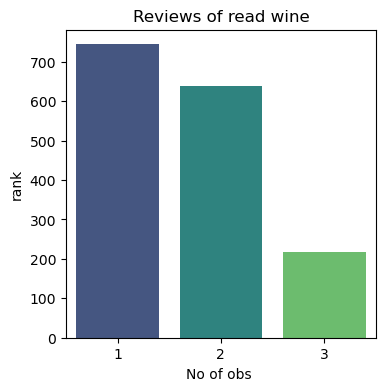

In [53]:
# Check class distribution reviews in a plot bar chart
#set color

# set figure size
plt.figure(figsize=(4,4))

sns.countplot(data = wineMC, x = 'Reviews', hue='Reviews', palette="viridis", dodge=False )
plt.title('Reviews of read wine')
plt.xlabel('No of obs ')
plt.ylabel('rank');

In [54]:
#Check reviews distribution
wineMC.Reviews.value_counts()

Reviews
1    744
2    638
3    217
Name: count, dtype: int64

### Step 8. Seperate Training and Testing Data (Multi-class)

In [55]:
#Split features and corresponding labels
X = wineMC.iloc[:,:11]
Y = wineMC['Reviews']

In [56]:
#test_size = 0.25 means 75% data for training and remaining 25% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state=42)

In [57]:
#Check shapes of split trains and test data
def check_shapes(X_train, X_test, Y_train, Y_test):
    print(f"x_train shape: {X_train.shape}")
    print(f"x_test shape: {X_test.shape}")
    print(f"y_train shape: {Y_train.shape}")
    print(f"y_test shape: {Y_test.shape}")

# print the shapes
check_shapes(X_train, X_test, Y_train, Y_test)

x_train shape: (1199, 11)
x_test shape: (400, 11)
y_train shape: (1199,)
y_test shape: (400,)


In [58]:
#Scaled numerical values- Multi-class
scaler = StandardScaler()
X_train_scaled_ = scaler.fit_transform(X_train)
X_test_scaled_ = scaler.transform(X_test)


### Step 9. Evaluate the Performances of the SVM Algorithm (Multi-class)

#### Assessing different Kernel types

In [59]:
#Create SVM linear- Multi-class
svm_linear_M = SVC(gamma='auto', kernel='linear', probability=True, random_state=42)

#Train the model using the training sets
svm_linear_M.fit(X_train_scaled_, Y_train) 

#Predict the response for test dataset
Y_pred_linear_M = svm_linear_M.predict(X_test_scaled_)

# Model Accuracy, how often is the classifier correct?
accuracy_linear_M= metrics.accuracy_score(Y_pred_linear_M,Y_test) * 100
precision_linear_weighted_M = precision_score(Y_test, Y_pred_linear_M, average='weighted')
recall_linear_weighted_M = recall_score(Y_test, Y_pred_linear_M, average='weighted')
f1_linear_weighted_M = f1_score(y_test, Y_pred_linear_M, average='weighted')

In [60]:
#Create SVM rbf- multi-class
svm_rbf_M = SVC(gamma='auto', kernel='rbf', probability=True,random_state=42)

#Train the model using the training sets
svm_rbf_M .fit(X_train_scaled_, Y_train) 

#Predict the response for test dataset
y_pred_rbf_M  = svm_rbf_M.predict(X_test_scaled_)

# Model Accuracy, how often is the classifier correct?
accuracy_rbf_M  = metrics.accuracy_score(y_pred_rbf_M , Y_test) * 100
precision_rbf_weighted_M = precision_score(Y_test, y_pred_rbf_M , average='weighted')
recall_rbf_weighted_M = recall_score(Y_test, y_pred_rbf_M , average='weighted')
f1_rbf_weighted_M = f1_score(Y_test, y_pred_rbf_M , average='weighted')

#### Evaluating Model Performance Metrics

In [61]:
# Create a summary DataFrame
results = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score (Weighted)','Precision (Weighted)', 'Recall (Weighted)'],
    'SVM Linear': [accuracy_linear_M, precision_linear_weighted_M, recall_linear_weighted_M, f1_linear_weighted_M],
    'SVM RBF': [accuracy_rbf_M,precision_rbf_weighted_M, recall_rbf_weighted_M, f1_rbf_weighted_M]
})

print(results)

                 Metric  SVM Linear  SVM RBF
0              Accuracy       60.00    64.50
1   F1 Score (Weighted)        0.59     0.64
2  Precision (Weighted)        0.60     0.65
3     Recall (Weighted)        0.65     0.64


#### Confusion Matrix for the SVM Algorithm (Multi-class)


Text(0.5, 1.0, 'SVM linear, Confusion Matrix for Multi-class')

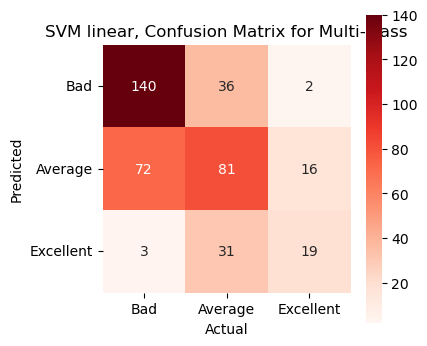

In [62]:
#Kernel linear,multi-class
plt.figure(figsize=(4, 4))

mat = confusion_matrix(Y_test, Y_pred_linear_M)

axes = sns.heatmap(mat,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.Reds)

class_labels = ['Bad', 'Average', 'Excellent']

axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.set_xticklabels(class_labels,rotation=0)

axes.set_yticklabels(class_labels,rotation=0)

axes.set_title('SVM linear, Confusion Matrix for Multi-class')

Text(0.5, 1.0, 'SVM rbf, gamma=auto, Confusion Matrix for Multi-class')

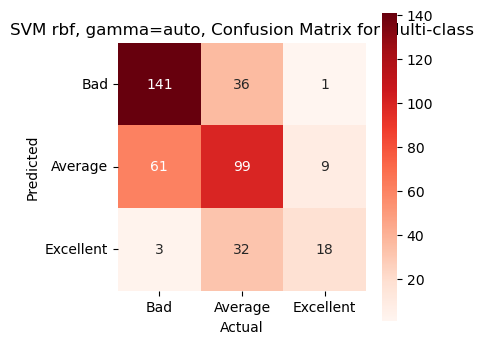

In [63]:
#Kernel rbf, gamma='auto', multi-class
plt.figure(figsize=(4, 4))
mat = confusion_matrix(Y_test, y_pred_rbf_M)

axes = sns.heatmap(mat,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.Reds)

class_labels = ['Bad', 'Average', 'Excellent']

axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.set_xticklabels(class_labels,rotation=0)

axes.set_yticklabels(class_labels,rotation=0)

axes.set_title('SVM rbf, gamma=auto, Confusion Matrix for Multi-class')

Data is irregular and wrapper techiques or cost-sensitive ensemble it is required to handle imbalance and get better misclassifaction performance for the minority class

In [64]:
#Create SVM Model- kernel='rbf' and gamma=0.1,multi=class
# Ensure reproducibility
random_state = 42

SVM_rbf_M_2 = SVC(gamma=0.1 , kernel='rbf',probability=True, random_state=random_state)# No C was specify so the default value of C is C=1

#Train the model using the training sets
SVM_rbf_M_2.fit(X_train_scaled_, Y_train) 
#Predict the response for test dataset
Y_pred_rbf_M_2 = SVM_rbf_M_2.predict(X_test_scaled_)
# Model Accuracy, how often is the classifier correct?
precision_rbf_M_2 = metrics.accuracy_score(Y_pred_rbf_M_2, Y_test) * 100
print("Accuracy with SVM (Multi-class): {0:.2f}%".format(precision_rbf_M_2))

Accuracy with SVM (Multi-class): 64.00%


In [65]:
# Evaluate RBF Kernel (for SVM_rbf_M_2),gamma=0.1 multi-class
print("RBF Kernel Performance:")
pre_val_rbf_M_2 = precision_score(Y_test, Y_pred_rbf_M_2, average='weighted', zero_division=1)
rec_val_rbf_M_2 = recall_score(Y_test, Y_pred_rbf_M_2, average='weighted', zero_division=1)
f1_val_rbf_M_2 = f1_score(Y_test, Y_pred_rbf_M_2, average='weighted', zero_division=1)


print(f'Precision: {pre_val_rbf_M_2:.3f}')
print(f'Recall: {rec_val_rbf_M_2:.3f}')
print(f'F1: {f1_val_rbf_M_2:.3f}')


RBF Kernel Performance:
Precision: 0.634
Recall: 0.640
F1: 0.631


Text(0.5, 1.0, 'SVM rbf, gamma=1, Confusion Matrix for Multi-class')

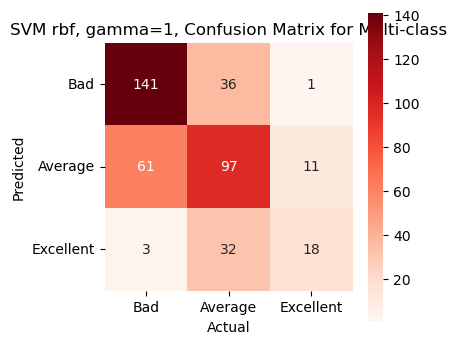

In [66]:
#Kernel rbf, multi-class
plt.figure(figsize=(4, 4))

mat = confusion_matrix(Y_test, Y_pred_rbf_M_2)

axes = sns.heatmap(mat,square=True, annot=True,fmt='d',
                   cbar=True, cmap=plt.cm.Reds)

class_labels = ['Bad', 'Average', 'Excellent']

axes.set_xlabel('Actual')
axes.set_ylabel('Predicted')
axes.set_xticklabels(class_labels,rotation=0)

axes.set_yticklabels(class_labels,rotation=0)

axes.set_title('SVM rbf, gamma=1, Confusion Matrix for Multi-class')

The change in gamma did not improve the performance of multiclass accuracy.

Let's apply SMOTE which increase the number of instances in the minority class to handle data imbalance

#### Handling imbalance using SMOTE

In [67]:
# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train_scaled_, Y_train)

In [68]:
# Initialize SVM with RBF kernel and gamma='auto'

SVM_rbf_M_3 = SVC(gamma='auto' , kernel='rbf',probability=True, random_state=random_state)# No C was specify so the default value of C is C=1

#Train the model using the training sets
SVM_rbf_M_3.fit(X_train_balanced, Y_train_balanced) 

#Predict the response for test dataset
Y_pred_rbf_M_3 = SVM_rbf_M_3.predict(X_test_scaled_)
# Model Accuracy, how often is the classifier correct?
precision_rbf_M_3 = metrics.accuracy_score(Y_pred_rbf_M_3, Y_test) * 100
print("Accuracy with SVM (Multi-class): {0:.2f}%".format(precision_rbf_M_3))

Accuracy with SVM (Multi-class): 63.25%


In [69]:
# Evaluate RBF Kernel, balanced train dataset and gamma='auto'
print("RBF Kernel Performance with SVM_rbf_M_3:")
pre_val_rbf_M_3 = precision_score(y_true=Y_test, y_pred=Y_pred_rbf_M_3, average='weighted', zero_division=1)
rec_val_rbf_M_3 = recall_score(y_true=Y_test, y_pred=Y_pred_rbf_M_3, average='weighted', zero_division=1)
f1_val_rbf_M_3 = f1_score(y_true=Y_test, y_pred=Y_pred_rbf_M_3, average='weighted', zero_division=1)


print(f'Precision: {pre_val_rbf_M_3:.3f}')
print(f'Recall: {rec_val_rbf_M_3:.3f}')
print(f'F1: {f1_val_rbf_M_3:.3f}')


RBF Kernel Performance with SVM_rbf_M_3:
Precision: 0.640
Recall: 0.632
F1: 0.629


In [70]:
# Initialize SVM with RBF kernel and balanced class weights
SVM_rbf_M_4 = SVC(gamma='auto', kernel='rbf', class_weight='balanced', probability=True, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled_)
X_test_pca = pca.transform(X_test_scaled_)

# Train the model
SVM_rbf_M_4.fit(X_train_pca, Y_train)

# Predict the response for PCA-transformed test data
Y_pred_rbf_M_4 = SVM_rbf_M_4.predict(X_test_pca)

# Model Accuracy, how often is the classifier correct?
precision_rbf_M_4 = metrics.accuracy_score(Y_pred_rbf_M_4, Y_test) * 100
print("Accuracy with SVM (Multi-class): {0:.2f}%".format(precision_rbf_M_4))


Accuracy with SVM (Multi-class): 50.50%


In [71]:
# Evaluate model performance RBf kernel, gamma= auto and calss_wieght=balanced
pre_val_rbf_M_4 = precision_score(y_true=Y_test, y_pred=Y_pred_rbf_M_4, average='weighted', zero_division=1)
rec_val_rbf_M_4 = recall_score(y_true=Y_test, y_pred=Y_pred_rbf_M_4, average='weighted', zero_division=1)
f1_val_rbf_M_4 = f1_score(y_true=Y_test, y_pred=Y_pred_rbf_M_4, average='weighted', zero_division=1)

# Print performance metrics
print("RBF Kernel Performance with Balanced Class Weights and PCA:")
print(f'Precision: {pre_val_rbf_M_4:.3f}')
print(f'Recall: {rec_val_rbf_M_4:.3f}')
print(f'F1: {f1_val_rbf_M_4:.3f}')


RBF Kernel Performance with Balanced Class Weights and PCA:
Precision: 0.506
Recall: 0.505
F1: 0.500


In [72]:
# Perform cross-validation in perfromace metrics to ensure that your performance metrics are robust and not due to overfitting or data splitting issues
cv_scores = cross_val_score(SVM_rbf_M_4, X_train_pca, Y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

Cross-Validation Accuracy: 0.51 ± 0.02


The previous techniques used to handle data imbalance did not improve performance metrics.  It is recommended to try other type of algorithms such as RF and K-cluster, try other sample techniques like Tomek Links, ensample methods like balanced Forest or EasyEnsenmble, cost-sensitivity to penalise misclassification of the minority heavily. We will use other algorithms  including DT and K-NN

##### AOC and ROC SVM Multi-class

AUC with SVM (RBF Kernel, gamma=0.1) for class 1: 0.81


<Figure size 400x400 with 0 Axes>

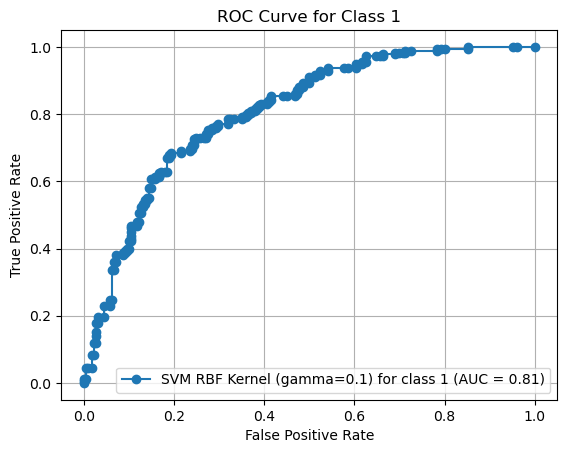

In [73]:
# Ensure reproducibility
plt.figure(figsize=(4, 4))

# SVM Model with RBF kernel
svm_rbf_3 = SVC(C=1, gamma=0.01, kernel='rbf', probability=True, random_state=42)

# Train the model using the training set
svm_rbf_3.fit(X_train_scaled_, Y_train)

# Predict the response for the test dataset
y_pred_rbf_3 = svm_rbf_3.predict(X_test_scaled_)
y_pred_prob_rbf_3 = svm_rbf_3.predict_proba(X_test_scaled_)  # Probability estimates for all classes

# Choose the class of interest (e.g., class '1' or class '2')
class_of_interest = '1'

# Map class labels to indices
class_labels = sorted(np.unique(Y_train))  # Get all unique class labels
class_to_index = {label: idx for idx, label in enumerate(class_labels)}  # Create a mapping from class labels to indices

# Ensure the class_of_interest is valid
if class_of_interest not in class_to_index:
    raise ValueError(f"Class {class_of_interest} is not in the training labels")

class_index = class_to_index[class_of_interest]

# Convert Y_test to binary for the class of interest
y_test_binary = (Y_test == class_of_interest).astype(int)

# Get the predicted probabilities for the class of interest
y_pred_prob_class = y_pred_prob_rbf_3[:, class_index]

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob_class, pos_label=1)
auc_rbf_3 = roc_auc_score(y_test_binary, y_pred_prob_class)

# Print the AUC
print(f'AUC with SVM (RBF Kernel, gamma=0.1) for class {class_of_interest}: {auc_rbf_3:.2f}')

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, marker='o', label=f'SVM RBF Kernel (gamma=0.1) for class {class_of_interest} (AUC = {auc_rbf_3:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Class {class_of_interest}')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Step 10. Evaluate the Performances of the K-NN Algorithm (Multi-class)

#### Assessing different N-neigbours


#### Evaluating Model Performance Metrics

In [74]:
# Define the range of neighbors to test
neighbors_range = range(2, 10)  # n_neighbors from 2 to 10

# Iterate over the range of neighbors
for n_neighbors in neighbors_range:
    # Create KNN model with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model using the training set
    knn.fit(X_train_scaled_, Y_train)
    
    # Predict the response for the test dataset
    Y_pred_knn = knn.predict(X_test_scaled_)
    
    # Calculate metrics
    accuracy_knn = metrics.accuracy_score(Y_test, Y_pred_knn) * 100
    precision_knn = precision_score(Y_test, Y_pred_knn, average='weighted')
    recall_knn = recall_score(Y_test, Y_pred_knn, average='weighted')
    f1_knn = f1_score(Y_test, Y_pred_knn, average='weighted')
   
    
    # Print the metrics
    print(f"Performance with K-NN ({n_neighbors} neighbors):")
    print(f"Accuracy: {accuracy_knn:.2f}%")
    print(f"Precision: {precision_knn:.3f}")
    print(f"Recall: {recall_knn:.3f}")
    print(f"F1 Score: {f1_knn:.3f}")
    print()


Performance with K-NN (2 neighbors):
Accuracy: 60.50%
Precision: 0.603
Recall: 0.605
F1 Score: 0.591

Performance with K-NN (3 neighbors):
Accuracy: 57.50%
Precision: 0.573
Recall: 0.575
F1 Score: 0.574

Performance with K-NN (4 neighbors):
Accuracy: 58.00%
Precision: 0.573
Recall: 0.580
F1 Score: 0.574

Performance with K-NN (5 neighbors):
Accuracy: 61.25%
Precision: 0.613
Recall: 0.613
F1 Score: 0.611

Performance with K-NN (6 neighbors):
Accuracy: 59.50%
Precision: 0.593
Recall: 0.595
F1 Score: 0.590

Performance with K-NN (7 neighbors):
Accuracy: 60.75%
Precision: 0.606
Recall: 0.608
F1 Score: 0.606

Performance with K-NN (8 neighbors):
Accuracy: 61.25%
Precision: 0.607
Recall: 0.613
F1 Score: 0.607

Performance with K-NN (9 neighbors):
Accuracy: 61.00%
Precision: 0.611
Recall: 0.610
F1 Score: 0.609



#### AUC and ROC KNN Multiple class

##### Class=1 Bad Reviews

AUC with K-NN (2 neighbors) for class 1: 0.76


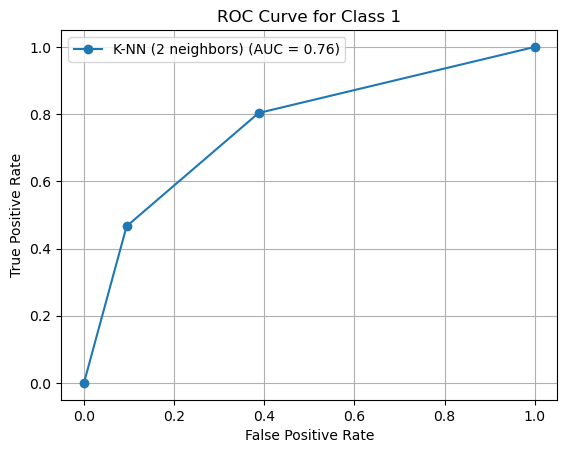

AUC with K-NN (3 neighbors) for class 1: 0.76


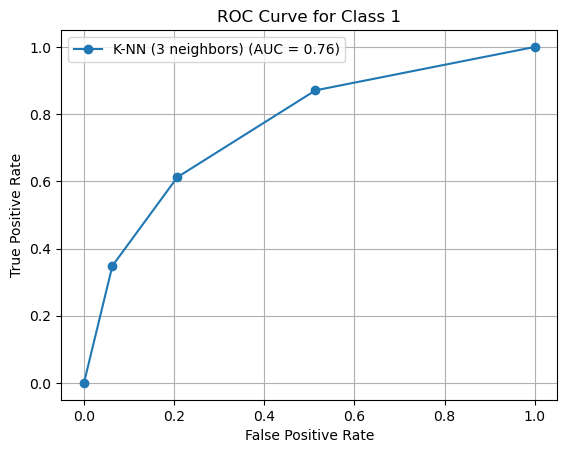

AUC with K-NN (4 neighbors) for class 1: 0.77


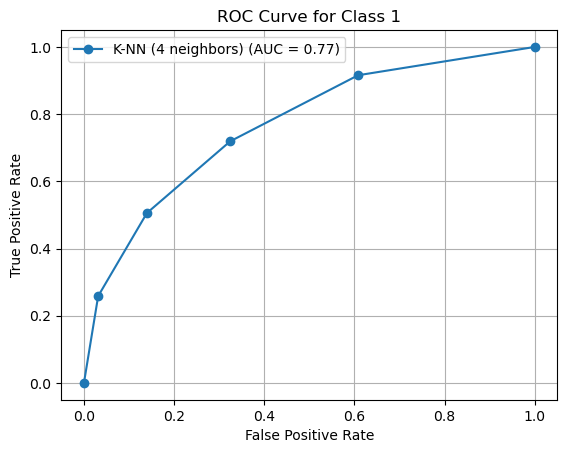

AUC with K-NN (5 neighbors) for class 1: 0.77


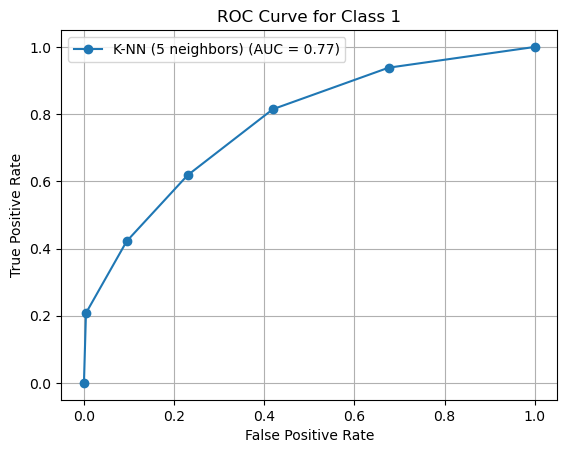

AUC with K-NN (6 neighbors) for class 1: 0.77


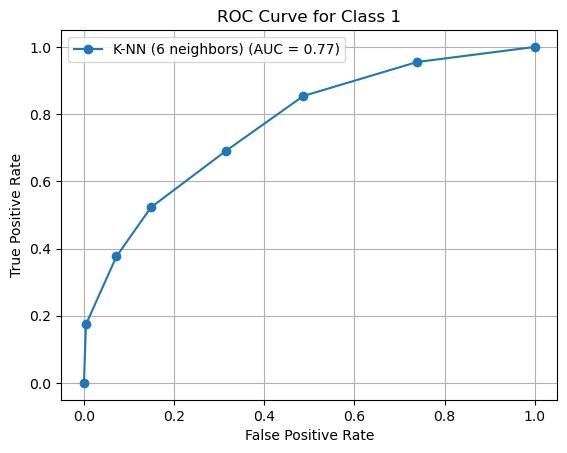

AUC with K-NN (7 neighbors) for class 1: 0.77


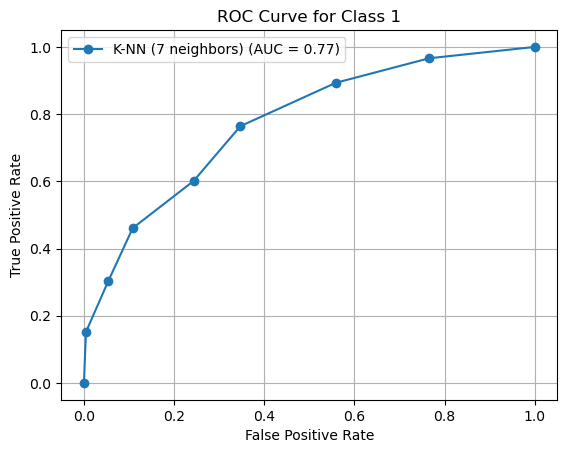

AUC with K-NN (8 neighbors) for class 1: 0.78


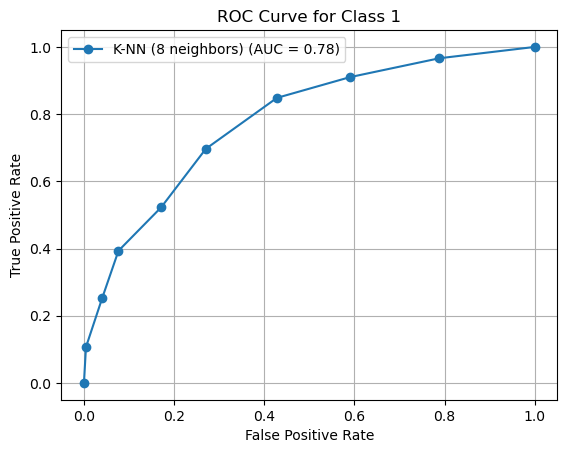

AUC with K-NN (9 neighbors) for class 1: 0.79


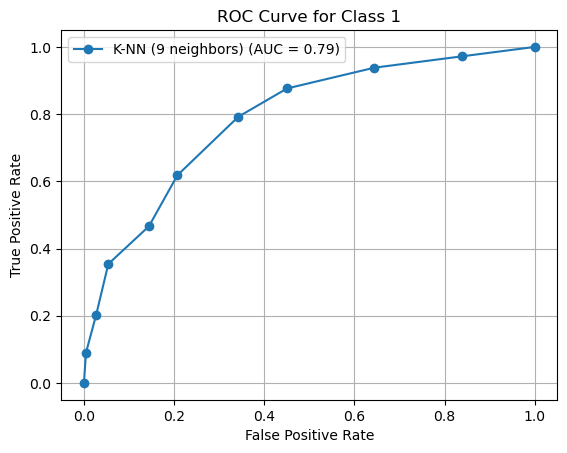

In [75]:
# Define the range of neighbors to test
neighbors_range = range(2, 10)  # n_neighbors from 2 to 10

# Class to evaluate (change this to the class you're interested in)
class_of_interest = '1'

# Map class labels to indices
class_labels = sorted(np.unique(Y_train))  # Get all unique class labels
class_to_index = {label: idx for idx, label in enumerate(class_labels)}  # Create a mapping from class labels to indices

# Ensure the class_of_interest is valid
if class_of_interest not in class_to_index:
    raise ValueError(f"Class {class_of_interest} is not in the training labels")

class_index = class_to_index[class_of_interest]

# Iterate over the range of neighbors
for n_neighbors in neighbors_range:
    # Create KNN model with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model using the training set
    knn.fit(X_train_scaled_, Y_train)
    
    # Predict the response for the test dataset
    Y_pred_knn = knn.predict(X_test_scaled_)
    Y_pred_prob_knn = knn.predict_proba(X_test_scaled_)[:, class_index]  # Probability estimates for the class of interest
    
    # Convert y_test to binary for the class of interest
    Y_test_binary = (Y_test == class_of_interest).astype(int)
    
    # Calculate ROC Curve and AUC
    fpr, tpr, _ = roc_curve(Y_test_binary, Y_pred_prob_knn, pos_label=1)
    auc_knn = roc_auc_score(Y_test_binary, Y_pred_prob_knn)
    
    # Print the AUC
    print(f'AUC with K-NN ({n_neighbors} neighbors) for class {class_of_interest}: {auc_knn:.2f}')
    
    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, marker='o', label=f'K-NN ({n_neighbors} neighbors) (AUC = {auc_knn:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {class_of_interest}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

The AUC for class 1 is 0.78 which indicates the model has the ability to discriminate the positive and negative classes. The model could potentially be improved if various factors such as class imbalance (more volume to class=2 (Good reviews) and Bad reviews class=2), noise in the dataset, model configuration, type of model selected is evaluated.

#### Confusion Matrix for the K-NN Algorithm (Multi-class)

<Figure size 500x500 with 0 Axes>

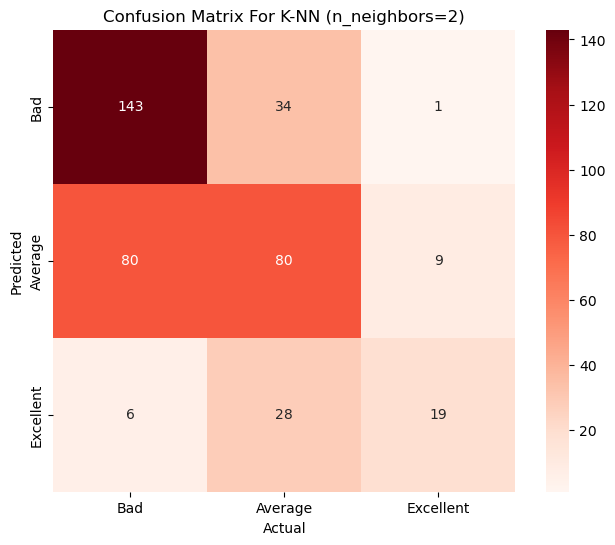

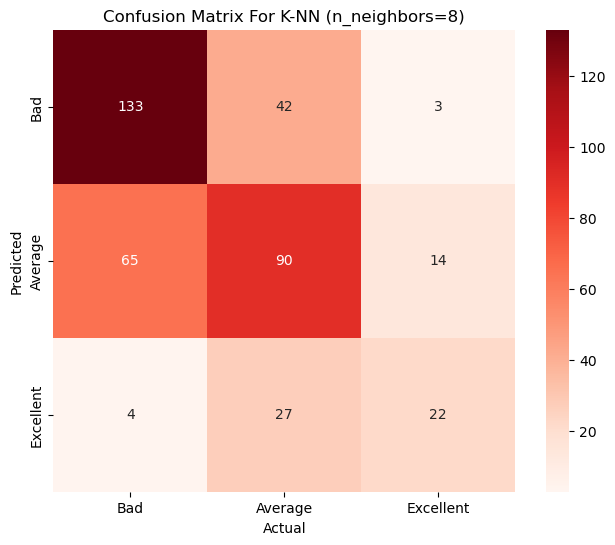

In [77]:
# Define the specific neighbors to test
plt.figure(figsize=(5, 5))
specific_neighbors = [2, 8]

# Define the class labels for multi-class classification
class_labels = ['Bad', 'Average', 'Excellent']

# Iterate over the specific neighbors
for n_neighbors in specific_neighbors:
    # Create KNN model with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the model using the training set
    knn.fit(X_train_scaled_, Y_train)
    
    # Predict the response for the test dataset
    Y_pred_knn = knn.predict(X_test_scaled_)
    
    # Compute the confusion matrix
    mat = confusion_matrix(Y_test, Y_pred_knn)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    axes = sns.heatmap(mat, square=True, annot=True, fmt='d',
                       cbar=True, cmap=plt.cm.Reds, 
                       xticklabels=class_labels, yticklabels=class_labels)
    
    # Set labels
    axes.set_xlabel('Actual')
    axes.set_ylabel('Predicted')
    
    # Set the title
    axes.set_title(f'Confusion Matrix For K-NN (n_neighbors={n_neighbors})')
    
    # Show the plot
    plt.show()


When comparing K-NN with different N n-neighbours it seems the most suitable among these examples is the K-NN for Binary Classification. However, this model seems to perform to classify Average reviews but not for Bad nor Excellent reviews. Bad reviews are the outcome of importance in this project. The KNN might not be the best model option for Bad reviews classification. 

### Step 11. Evaluate the Performances of the Decision Tree (DT) Algorithm (Multi-class)

In [78]:
#Create DT Model
DT = DecisionTreeClassifier(random_state=42)
#Train the model using the training sets
DT.fit(X_train_scaled_,Y_train)
#Predict the response for test dataset
Y_pred_DT = DT.predict(X_test_scaled)
# Model Accuracy
accuracy_rbf  = metrics.accuracy_score(Y_pred_DT , Y_test) * 100
print("Accuracy with Decision Tree (Multi-class): {0:.2f}%".format(accuracy_rbf))

Accuracy with Decision Tree (Multi-class): 64.00%


#### Assessing different DT_

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_decision_tree_metrics(X_train_scaled_, Y_train, X_test_scaled_, Y_test):
    metrics_dict = {}
    max_depths = [None, 3]  # Default max_depth (None) and max_depth=3
    
    for max_depth in max_depths:
        # Create Decision Tree model with the current max_depth
        tree = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
        
        # Train the model
        tree.fit(X_train_scaled_, Y_train)
        
        # Predict the response for the test dataset
        Y_pred_t = tree.predict(X_test_scaled_)
        
        # Calculate various metrics
        accuracy_DT_M = accuracy_score(Y_test, Y_pred_t) * 100
        precision_DT_M = precision_score(Y_test, Y_pred_t, average='weighted')
        recall_DT_M = recall_score(Y_test, Y_pred_t, average='weighted')
        f1_DT_M = f1_score(Y_test, Y_pred_t, average='weighted')
        
        # Store the results
        depth_label = f'Decision Tree (MAX_DEPTH={max_depth if max_depth is not None else "default"})'
        metrics_dict[depth_label] = {
            'Accuracy': accuracy_DT_M,
            'Precision': precision_DT_M,
            'Recall': recall_DT_M,
            'F1 Score': f1_DT_M
        }
        
    return metrics_dict

# Evaluate DT
metrics = evaluate_decision_tree_metrics(X_train_scaled_, Y_train, X_test_scaled_, Y_test)

# Print the results
for model, metrics_values in metrics.items():
    print(f'\nPerformance Metrics for {model}:')
    print(f'Accuracy: {metrics_values["Accuracy"]:.2f}%')
    print(f'Precision: {metrics_values["Precision"]:.3f}')
    print(f'Recall: {metrics_values["Recall"]:.3f}')
    print(f'F1 Score: {metrics_values["F1 Score"]:.3f}')



Performance Metrics for Decision Tree (MAX_DEPTH=default):
Accuracy: 64.00%
Precision: 0.643
Recall: 0.640
F1 Score: 0.641

Performance Metrics for Decision Tree (MAX_DEPTH=3):
Accuracy: 56.50%
Precision: 0.556
Recall: 0.565
F1 Score: 0.528


#### Plot DT Multi-class

Accuracy with Decision Tree (max_depth=2): 52.00%


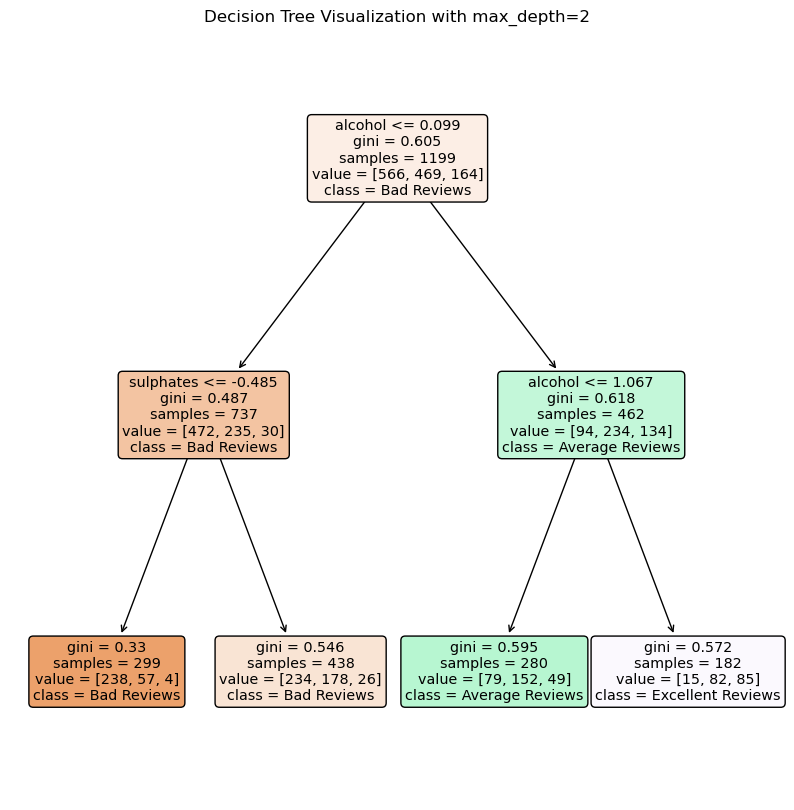

Accuracy with Decision Tree (max_depth=3): 56.50%


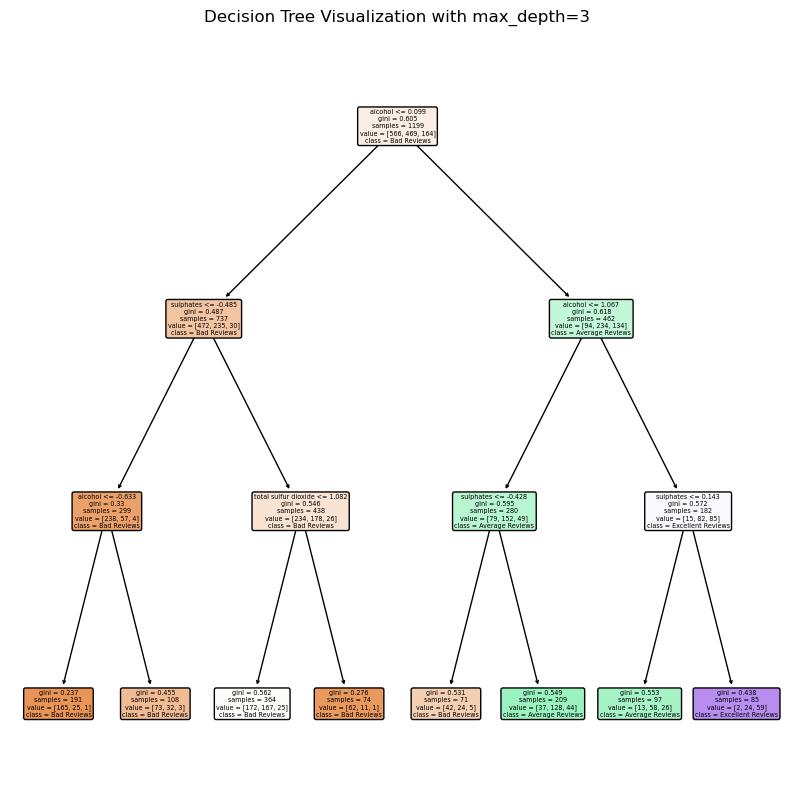

Accuracy with Decision Tree (Multi-class): 64.00%


In [80]:
# List of feature names (replace with your actual feature names)
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 
    'residual sugar', 'chlorides', 'free sulfur dioxide', 
    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'
]

# Class names for multi-class classification
class_names = ['Bad Reviews', 'Average Reviews', 'Excellent Reviews']

# Train and visualize Decision Trees with different max_depth values
for depth in [2, 3]:
    # Create the Decision Tree model with the specified max_depth
    tree = DecisionTreeClassifier(random_state=42, max_depth=depth)
    
    # Train the model
    tree.fit(X_train_scaled_, Y_train)
    
    # Predict the response for the test dataset
    y_pred_t_M = tree.predict(X_test_scaled_)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred_t_M) * 100
    print(f"Accuracy with Decision Tree (max_depth={depth}): {accuracy:.2f}%")
    
    # Plot the Decision Tree
    plt.figure(figsize=(10,10))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
    plt.title(f'Decision Tree Visualization with max_depth={depth}')
    plt.show()

# Create and train a Decision Tree model without max_depth restriction for multi-class classification
random_seed = 42  # You can choose any number
DT = DecisionTreeClassifier(random_state=random_seed)

# Train the model using the training sets
DT.fit(X_train_scaled_, Y_train)

# Predict the response for the test dataset
y_pred_DT_M = DT.predict(X_test_scaled_)

# Model Accuracy
precision = accuracy_score(Y_test, y_pred_DT_M) * 100
print("Accuracy with Decision Tree (Multi-class): {0:.2f}%".format(precision))

# Plot the full Decision Tree
#plt.figure(figsize=(20,10))
#plot_tree(DT, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
#plt.title('Full Decision Tree Visualization')
#plt.show()


#### Confusion Matrix for the DT Algorithm (Multi-class)

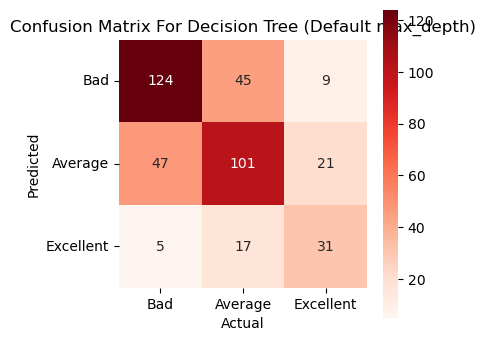

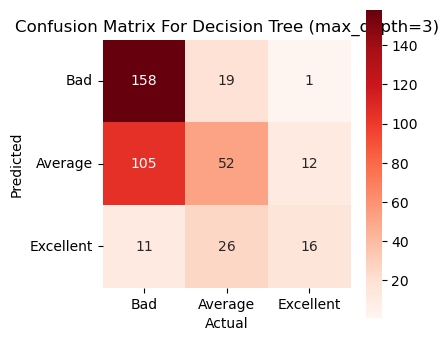

In [81]:
# Define class labels
class_labels = ['Bad', 'Average', 'Excellent']

# Create and train Decision Tree model with default max_depth
DT_default = DecisionTreeClassifier(random_state=random_seed)
DT_default.fit(X_train_scaled, Y_train)

# Predict the response for test dataset
Y_pred_default = DT_default.predict(X_test_scaled)

# Compute confusion matrix for default model
mat_default = confusion_matrix(Y_test, Y_pred_default)

# Plot confusion matrix for default model
plt.figure(figsize=(4, 4))
axes_default = sns.heatmap(mat_default, square=True, annot=True, fmt='d',
                           cbar=True, cmap=plt.cm.Reds)

axes_default.set_xlabel('Actual')
axes_default.set_ylabel('Predicted')
axes_default.set_xticklabels(class_labels, rotation=0)
axes_default.set_yticklabels(class_labels, rotation=0)
axes_default.set_title('Confusion Matrix For Decision Tree (Default max_depth)')
plt.show()

# Create and train Decision Tree model with max_depth=3
DT_max_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=random_seed)
DT_max_depth_3.fit(X_train_scaled, Y_train)

# Predict the response for test dataset
Y_pred_max_depth_3 = DT_max_depth_3.predict(X_test_scaled)

# Compute confusion matrix for model with max_depth=3
mat_max_depth_3 = confusion_matrix(Y_test, Y_pred_max_depth_3)

# Plot confusion matrix for model with max_depth=3
plt.figure(figsize=(4, 4))
axes_max_depth_3 = sns.heatmap(mat_max_depth_3, square=True, annot=True, fmt='d',
                               cbar=True, cmap=plt.cm.Reds)

axes_max_depth_3.set_xlabel('Actual')
axes_max_depth_3.set_ylabel('Predicted')
axes_max_depth_3.set_xticklabels(class_labels, rotation=0)
axes_max_depth_3.set_yticklabels(class_labels, rotation=0)
axes_max_depth_3.set_title('Confusion Matrix For Decision Tree (max_depth=3)')
plt.show()


#### AOC and ROC DT Multi-Class

##### Class=1 Bad Reviews

AUC with Decision Tree (max_depth=None) for class 1: 0.73


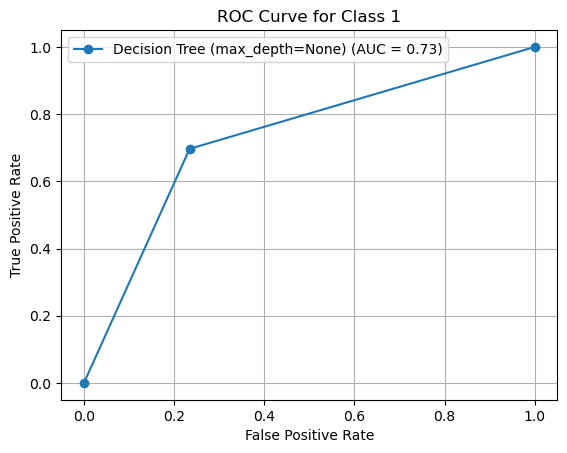

AUC with Decision Tree (max_depth=3) for class 1: 0.78


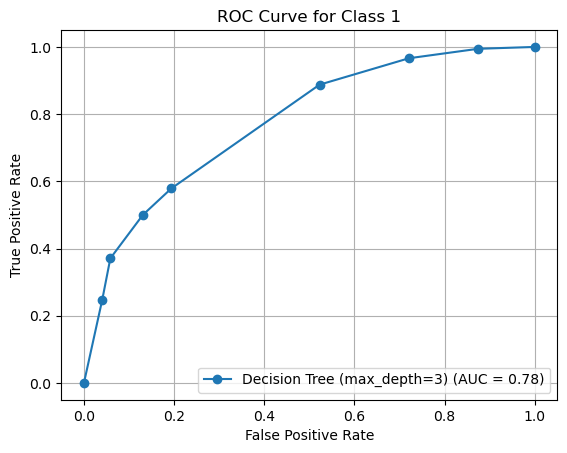

In [82]:
def evaluate_decision_tree_metrics(X_train_scaled, Y_train, X_test_scaled, Y_test, class_of_interest='1'):
    max_depths = [None, 3]  # Default max_depth (None) and max_depth=3
    
    # Get the unique class labels
    class_labels = sorted(np.unique(Y_train))
    class_to_index = {label: idx for idx, label in enumerate(class_labels)}

    # Ensure the class_of_interest is valid
    if class_of_interest not in class_to_index:
        raise ValueError(f"Class {class_of_interest} is not in the training labels")

    class_index = class_to_index[class_of_interest]

    for max_depth in max_depths:
        # Create Decision Tree model with the current max_depth
        tree = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
        
        # Train the model
        tree.fit(X_train_scaled_, Y_train)
        
        # Predict the response for the test dataset
        y_pred_prob_t = tree.predict_proba(X_test_scaled_)[:, class_index]  # Probability estimates for the class of interest
        
        # Convert y_test to binary for the class of interest
        y_test_binary = (Y_test == class_of_interest).astype(int)
        
        # Calculate ROC Curve and AUC
        fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob_t, pos_label=1)
        auc_t = roc_auc_score(y_test_binary, y_pred_prob_t)
        
        # Print the AUC
        print(f'AUC with Decision Tree (max_depth={max_depth}) for class {class_of_interest}: {auc_t:.2f}')
        
        # Plot ROC Curve
        plt.figure()
        plt.plot(fpr, tpr, marker='o', label=f'Decision Tree (max_depth={max_depth}) (AUC = {auc_t:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for Class {class_of_interest}')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

# Evaluate DT
evaluate_decision_tree_metrics(X_train_scaled, Y_train, X_test_scaled, Y_test, class_of_interest='1')

#### Summary Model Performace Metrics for all models

#### Binary Class

In [83]:
def evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test):
    results = []

    # Linear SVM
    linear_svm = SVC(kernel='linear', random_state=42)
    linear_svm.fit(X_train_scaled, y_train)
    Y_pred_linear = linear_svm.predict(X_test_scaled)
    
    accuracy_linear = accuracy_score(y_test, Y_pred_linear) * 100
    precision_linear_weighted = precision_score(y_test, Y_pred_linear, average='weighted')
    recall_linear_weighted = recall_score(y_test, Y_pred_linear, average='weighted')
    f1_linear_weighted = f1_score(y_test, Y_pred_linear, average='weighted')

    results.append({
        'Model': 'Linear SVM',
        'Accuracy': accuracy_linear,
        'Precision': precision_linear_weighted,
        'Recall': recall_linear_weighted,
        'F1 Score': f1_linear_weighted
    })

    # RBF SVM
    rbf_svm = SVC(kernel='rbf', random_state=42)
    rbf_svm.fit(X_train_scaled, y_train)
    Y_pred_rbf = rbf_svm.predict(X_test_scaled)
    
    accuracy_rbf = accuracy_score(y_test, Y_pred_rbf) * 100
    precision_rbf_weighted = precision_score(y_test, Y_pred_rbf, average='weighted')
    recall_rbf_weighted = recall_score(y_test, Y_pred_rbf, average='weighted')
    f1_rbf_weighted = f1_score(y_test, Y_pred_rbf, average='weighted')

    results.append({
        'Model': 'RBF SVM',
        'Accuracy': accuracy_rbf,
        'Precision': precision_rbf_weighted,
        'Recall': recall_rbf_weighted,
        'F1 Score': f1_rbf_weighted
    })

    # K-NN 
    for n_neighbors in range(2, 10):
        knn_second_set = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn_second_set.fit(X_train_scaled, y_train)
        Y_pred_knn_second = knn_second_set.predict(X_test_scaled)
        
        accuracy_knn_second = accuracy_score(y_test, Y_pred_knn_second) * 100
        precision_knn_second = precision_score(y_test, Y_pred_knn_second, average='weighted')
        recall_knn_second = recall_score(y_test, Y_pred_knn_second, average='weighted')
        f1_knn_second = f1_score(y_test, Y_pred_knn_second, average='weighted')
        
        results.append({
            'Model': f'K-NN ({n_neighbors} neighbors)',
            'Accuracy': accuracy_knn_second,
            'Precision': precision_knn_second,
            'Recall': recall_knn_second,
            'F1 Score': f1_knn_second
        })

    # Decision Tree (max_depth=None and max_depth=3)
    for max_depth in [None, 3]:
        tree = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
        tree.fit(X_train_scaled, y_train)
        Y_pred_tree = tree.predict(X_test_scaled)
        
        accuracy_tree = accuracy_score(y_test, Y_pred_tree) * 100
        precision_tree = precision_score(y_test, Y_pred_tree, average='weighted')
        recall_tree = recall_score(y_test, Y_pred_tree, average='weighted')
        f1_tree = f1_score(y_test, Y_pred_tree, average='weighted')
        
        results.append({
            'Model': f'Decision Tree (MAX_DEPTH={max_depth if max_depth is not None else "default"})',
            'Accuracy': accuracy_tree,
            'Precision': precision_tree,
            'Recall': recall_tree,
            'F1 Score': f1_tree
        })

    # Create DataFrame
    df_summary = pd.DataFrame(results)

 # Print title and DataFrame
    print("Model Performance Summary- Binay Class:")
    print(df_summary)

# Evaluate Metrics Multi-Class
evaluate_models(X_train_scaled, y_train, X_test_scaled, y_test)


Model Performance Summary- Binay Class:
                                Model  Accuracy  Precision  Recall  F1 Score
0                          Linear SVM     72.50       0.73    0.72      0.73
1                             RBF SVM     76.00       0.76    0.76      0.76
2                  K-NN (2 neighbors)     69.75       0.72    0.70      0.70
3                  K-NN (3 neighbors)     71.25       0.71    0.71      0.71
4                  K-NN (4 neighbors)     69.50       0.70    0.69      0.70
5                  K-NN (5 neighbors)     70.25       0.70    0.70      0.70
6                  K-NN (6 neighbors)     68.75       0.69    0.69      0.69
7                  K-NN (7 neighbors)     68.75       0.69    0.69      0.69
8                  K-NN (8 neighbors)     71.50       0.72    0.71      0.72
9                  K-NN (9 neighbors)     71.50       0.71    0.71      0.71
10  Decision Tree (MAX_DEPTH=default)     72.00       0.72    0.72      0.72
11        Decision Tree (MAX_DEPTH=3

In [84]:
def evaluate_models(X_train_scaled_, Y_train, X_test_scaled_, Y_test):
    results = []

    # Linear SVM
    linear_svm = SVC(kernel='linear', random_state=42)
    linear_svm.fit(X_train_scaled_, Y_train)
    Y_pred_linear = linear_svm.predict(X_test_scaled_)
    
    accuracy_linear = accuracy_score(Y_test, Y_pred_linear) * 100
    precision_linear_weighted = precision_score(Y_test, Y_pred_linear, average='weighted')
    recall_linear_weighted = recall_score(Y_test, Y_pred_linear, average='weighted')
    f1_linear_weighted = f1_score(Y_test, Y_pred_linear, average='weighted')

    results.append({
        'Model': 'Linear SVM',
        'Accuracy': accuracy_linear,
        'Precision': precision_linear_weighted,
        'Recall': recall_linear_weighted,
        'F1 Score': f1_linear_weighted
    })

    # RBF SVM
    rbf_svm = SVC(kernel='rbf', random_state=42)
    rbf_svm.fit(X_train_scaled_, Y_train)
    Y_pred_rbf = rbf_svm.predict(X_test_scaled_)
    
    accuracy_rbf = accuracy_score(Y_test, Y_pred_rbf) * 100
    precision_rbf_weighted = precision_score(Y_test, Y_pred_rbf, average='weighted')
    recall_rbf_weighted = recall_score(Y_test, Y_pred_rbf, average='weighted')
    f1_rbf_weighted = f1_score(Y_test, Y_pred_rbf, average='weighted')

    results.append({
        'Model': 'RBF SVM',
        'Accuracy': accuracy_rbf,
        'Precision': precision_rbf_weighted,
        'Recall': recall_rbf_weighted,
        'F1 Score': f1_rbf_weighted
    })

    # K-NN 
    for n_neighbors in range(2, 10):
        knn_second_set = KNeighborsClassifier(n_neighbors=n_neighbors)
        knn_second_set.fit(X_train_scaled_, Y_train)
        Y_pred_knn_second = knn_second_set.predict(X_test_scaled_)
        
        accuracy_knn_second = accuracy_score(Y_test, Y_pred_knn_second) * 100
        precision_knn_second = precision_score(Y_test, Y_pred_knn_second, average='weighted')
        recall_knn_second = recall_score(Y_test, Y_pred_knn_second, average='weighted')
        f1_knn_second = f1_score(Y_test, Y_pred_knn_second, average='weighted')
        
        results.append({
            'Model': f'K-NN ({n_neighbors} neighbors)',
            'Accuracy': accuracy_knn_second,
            'Precision': precision_knn_second,
            'Recall': recall_knn_second,
            'F1 Score': f1_knn_second
        })

    # Decision Tree (max_depth=None and max_depth=3)
    for max_depth in [None, 3]:
        tree = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
        tree.fit(X_train_scaled_, Y_train)
        Y_pred_tree = tree.predict(X_test_scaled_)
        
        accuracy_tree = accuracy_score(Y_test, Y_pred_tree) * 100
        precision_tree = precision_score(Y_test, Y_pred_tree, average='weighted')
        recall_tree = recall_score(Y_test, Y_pred_tree, average='weighted')
        f1_tree = f1_score(Y_test, Y_pred_tree, average='weighted')
        
        results.append({
            'Model': f'Decision Tree (MAX_DEPTH={max_depth if max_depth is not None else "default"})',
            'Accuracy': accuracy_tree,
            'Precision': precision_tree,
            'Recall': recall_tree,
            'F1 Score': f1_tree
        })

    # Create DataFrame
    df_summary = pd.DataFrame(results)

# Print title and DataFrame
    print("Model Performance Summary- Multi-Class:")
    print(df_summary)

# Evaluate Metrics Multi-Class
evaluate_models(X_train_scaled_, Y_train, X_test_scaled_, Y_test)


Model Performance Summary- Multi-Class:
                                Model  Accuracy  Precision  Recall  F1 Score
0                          Linear SVM     60.00       0.59    0.60      0.59
1                             RBF SVM     64.50       0.64    0.65      0.64
2                  K-NN (2 neighbors)     60.50       0.60    0.60      0.59
3                  K-NN (3 neighbors)     57.50       0.57    0.57      0.57
4                  K-NN (4 neighbors)     58.00       0.57    0.58      0.57
5                  K-NN (5 neighbors)     61.25       0.61    0.61      0.61
6                  K-NN (6 neighbors)     59.50       0.59    0.59      0.59
7                  K-NN (7 neighbors)     60.75       0.61    0.61      0.61
8                  K-NN (8 neighbors)     61.25       0.61    0.61      0.61
9                  K-NN (9 neighbors)     61.00       0.61    0.61      0.61
10  Decision Tree (MAX_DEPTH=default)     64.00       0.64    0.64      0.64
11        Decision Tree (MAX_DEPTH=3

### Conclusions

#### Overall

Summary of Model Performance and Recommendations:

- SVM with RBF Kernel (gamma=0.1) for Binary Classification recorded a high accuracy (76%) with strong F1 score (0.770), precision (0.762), and recall (0.761). The confusion matrix shows a high number of true negatives (135), indicating the model is effective at identifying low-quality wines. Challenges: The model struggles with data imbalance, leading to more false negatives (FN) than false positives (FP). It is better at predicting low-quality wines than high-quality ones.
Recommendations: Improve the model by addressing data imbalance, testing different models, or adjusting hyperparameters. Ensemble methods like Random Forest could be more effective.
Random Forest (RF) for Binary Classification:

- RF with n_estimators=70 and max_depth=14 achieved the highest accuracy wht 93.5% and strong metrics across F1, precision, and recall. Adjusting n_estimators and max_depth helped reduce overfitting.
Feature Importance: Alcohol, volatile acidity, and sulphates are key indicators of wine quality, with good reviews associated with higher alcohol and sulphates and lower volatile acidity.
Recommendations: RF is the best-performing model for classifying red wines. Further improvement can be achieved by fine-tuning hyperparameters.
SVM with RBF Kernel for Multi-Class Classification:

- The RBF kernel yielded the highest accuracy (64.5%) and outperformed the linear kernel across F1, recall, and precision. However, the confusion matrix shows high misclassification rates for minority classes.
Recommendations: Consider addressing class imbalance and model configuration to improve the performance further.
K-Nearest Neighbors (KNN) for Binary and Multi-Class Classification:

- KNN with n_neighbors=8 provided a good balance between accuracy (71.5% for binary classification) and complexity, avoiding overfitting better than larger values of n_neighbors.
Challenges: High false positive rates and poor AUC scores indicate the model struggles with minority classes, particularly for binary classification.
Recommendations: n_neighbors=8 is a better choice for KNN to balance performance and complexity. Addressing class imbalance and refining the model configuration could further improve results.
Decision Tree (DT) for Binary and Multi-Class Classification:

- DT with max_depth=None achieved strong metrics for both binary and multi-class tasks, with accuracy up to 72% for binary classification. However, high false positive rates for minority classes indicate potential issues.
Recommendations: While DT performs well, improving class balance, reducing noise, and fine-tuning the model could enhance its performance.

Overall, Random Forest and SVM with RBF Kernel are the top-performing models, with Random Forest being particularly robust. Addressing data imbalance and fine-tuning models are key to further improvements.


[Applying Random Forest for Binary class](#applying-random-forest-for-binary-class)


#### For SVM models

SMV Binary:
Based on the model performance metrics, the Radial Basis Function (RBF) kernel, commonly referred to as the Gaussian kernel, is the most suitable for the SVM binary classification task. The model performs best with a gamma value of 0.1, indicating that this configuration effectively captures the underlying patterns in the data. It yields the highest accuracy with 76% (linear kernel -72.5%) as well as highest results for F1 score=0.770 (0.761), Recall=0.761 (0.725), Precision=0.762 (0.734) as comparison with the linear kernel. The later metrics provide a better measure of classification performance than accuracy, especially in cases of imbalanced datasets. 

The confusion matrix for SVM kernel=rbf, gamma=0.1 results are as follows:
•	True Positive (TP): 135 (linear Kernel= 137)- (Actual 'Bad' and predicted 'Bad')
•	False Negative (FN): 43 (41)- (Actual 'Bad' but predicted 'Good')
•	False Positive (FP): 53 (69) -(Actual 'Good' but predicted 'Bad')
•	True Negative (TN):169 (153) -(Actual 'Good' and predicted 'Good')

These results indicate that the RBF kernel not only provides a higher overall accuracy but also improves the balance between precision and recall, as evidenced by a lower false positive rate and a higher true negative count compared to the linear kernel. This makes the RBF kernel a more effective choice for this classification task. The RBF classifying better the true Good reviews. 

SMV Multi-class:
Based on the model performance metrics, RBF kernel seems to the most suitable for the SVM multi-class classification task. It yields the highest accuracy with 64.5% (linear kernel -60%) as well as highest results for F1 score=0.636 (0.589), Recall=0.645 (0.636), Precision=0.642 (0.589)  (0.328) as comparison with the linear kernel. The later metrics provide a better measure of classification performance than accuracy, especially in cases of imbalanced datasets. 

The confusion matrix for SVM kernel=rbf, gamma=’auto’ results are in the previous section:
•	Both confusion matrix has a high misclassification for the minority group with higher False Positive across three categories.

The AUC for class 1 is 0.83 which indicates the model has the ability to discriminate the positive and negative classes. The model could potentially be improved if various factors such as class imbalance (more volume to class=2 (Good reviews), noise in the dataset, model configuration, type of model selected is evaluated.

After comparing all performance results for SVM, K-NN , DT,RF the model with the highest model performance results is RF n_estimators = 70, max_depth =  14, random_state = 42 for Binary classification. New data was predicted using the trained RF and the accuracy, F1, F2, precision and recall results are high showing that most of the instances wine are correctly classifed.

#### For K-NN models

K-NN Binary:
Based on the model performance metrics, the KNN with n_neighbours=8, is the most suitable for the KNN for binary classification task. It yields the second highest accuracy with 71.5% (n=6 -68.75%) as well as second highest results for F1 score=0.715 (0.688), Recall=0.715 (0.688), Precision=0.716 (0.691)  as comparison with the KNN n=6. The later metrics provide a better measure of classification performance than accuracy, especially in cases of imbalanced datasets. 

Even though KNN with N=10 yields the highest model performance metrics with an accuracy of 75.5%, the performance metrics does not significant improve from n=8 to n=10, the results re quite close. This might be to the diminishing return when increasing the size of N-neighbours do not proportionally increase/improve significantly results. It is prefer the n=8  is considered a better choice to trade off complexity and performance to avoid overfitting. N= 10 reduces the variance but increase the biased leading to underfitting when too many n-neighbours leads to underfitting. So, N=10 and N=8 performs quite similarly and to lower the risk for overfitting the n=8 is selected. 

The confusion matrix for K-NN, n=8 results are as follows:
•	True Positive (TP): 124 (n=2= 143)- (Actual 'Bad' and predicted 'Bad')
•	False Negative (FN): 60 (86)- (Actual 'Bad' but predicted 'Good')
•	False Positive (FP): 54 (35) -(Actual 'Good' but predicted 'Bad')
•	True Negative (TN):162 (86) -(Actual 'Good' and predicted 'Good')

AUC and ROC for Class=1 (first columns below chart), Bad reviews is extremely low around 0.21 to 0.24 with N-neighbours= 2 AUC:0.24 and N-neighbours= 10  AUC:0.21. Even worst AUC when N-neighbours increases for class 1= bad reviews. Whereas, the AUC and ROC for Class=2 (second columns below chart), Good reviews is extremely low around .0.76 to 0.79 with N-neighbours= 2 AUC:0.76 and N-neighbours= 10  AUC:0.79. 

K-NN Multiclass:
Based on the model performance metrics, the KNN with n_neighbours=8, is the most suitable for the KNN for binary classification task. It yields the highest accuracy with 61.5% (n=6 -59.50%) as well as second highest results for F1 score=0.607 (0.593), Recall=0.613 (0.595), Precision=0.607 (0.593)  as comparison with the KNN n=6. The later metrics provide a better measure of classification performance than accuracy, especially in cases of imbalanced datasets. 

Even though KNN with N=10 yields the highest model performance metrics with F1 score=0.609, the performance metrics does not significant improve from n=8 to n=10, the results re quite close. It is prefer the n=8  is considered a better choice to trade off complexity and performance to avoid overfitting. The confusion matrix for  K-NN, n=8 results are as follows:
•	Both confusion matrix has a high misclassification for the minority group with higher False Positive across three categories.

The AUC for class 1 is 0.78 which indicates the model has the ability to discriminate the positive and negative classes. The model could potentially be improved if various factors such as class imbalance (more volume to class=2 (Good reviews) and Bad reviews class=2), noise in the dataset, model configuration, type of model selected is evaluated.

When comparing K-NN with different N-neighbours it seems the most suitable is the K-NN n=8 for Binary Classification. 



#### For DT models

DT Binary:
Based on the model performance metrics, the DT Max_depth=None, is the most suitable for the DT for binary classification task. It yields the second highest accuracy with 72.00% (Max_depth=3: 70.50%) as well as second highest results for F1 score=0.72 (0.71), Recall=0.72 (0.688), Precision=0.716 (0.69) as comparison with the DT Max_depth=3. The later metrics provide a better measure of classification performance than accuracy, especially in cases of imbalanced datasets. 

The confusion matrix for DT Max_depth=None results are as follows:
•	True Positive (TP): 120 (95)  (Actual 'Bad' and predicted 'Bad')
•	False Negative (FN): 58 (83)  (Actual 'Bad' but predicted 'Good')
•	False Positive (FP): 168 (187) (Actual 'Good' but predicted 'Bad')
•	True Negative (TN):54(35) (Actual 'Good' and predicted 'Good')

DT Multi-class:
Based on the model performance metrics, the DT Max_depth=None, is the most suitable for the DT for multi-class classification. It yields the highest accuracy with 64.30% (Max_depth=56.5%) as well as second highest results for F1 score=0.641 (0.528), Recall=0.565 (0.565), Precision=0.643 (0.556) as comparison with the DT Max_depth=3. 

The confusion matrix for  DT Max_depth=None results are as follows:
•	Both confusion matrix has a high misclassification for the minority group with higher False Positive across three categories.

The AUC for class 1 is 0.72 for DT max_depth=None and 0.76 for DT Max_depth=3 which indicates the model has the ability to discriminate the positive and negative classes. Again, the model could potentially be improved if various factors such as class imbalance (more volume to class=2 (Good reviews) and Bad reviews class=2), noise in the dataset, model configuration, type of model selected is evaluated.



### Applying Random Forest for Binary class

Ensemble methods like Random Forest or Gradient Boosting that can handle imbalance better by learning from a combination of weak learners

In [100]:
# Load and Preprocess the Data again to not use the previous Reviews class
wine_RF= pd.read_csv('winequality-red.csv', delimiter=';')

In [101]:
#check target variable
wine_RF.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

to make the classification outcomes a bit more direct, I create a new column named “Good reviews” in the original dataset wine_RF. “Good reviews” equals class=2 when the quality is equal or above 7. “Bad reviews ” equals class=2 when the quality is less o equal than 5

In [102]:
#Create a new column called Review. This column will contain the values of 1 and 2. 
#1 - Bad
#2 - Good

#Create an empty list called Reviews
reviews = []
for i in wine_RF['quality']:
    if i <= 6:
        reviews.append('1')
    elif i >= 7 :
        reviews.append('2')
wine_RF['Reviews'] = reviews

wine_RF.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,1
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,1
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,1
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,1
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,1


In [103]:
# Count the occurrences of each class in the 'Reviews' column
class_counts = wine_RF["Reviews"].value_counts()
class_counts

Reviews
1    1382
2     217
Name: count, dtype: int64

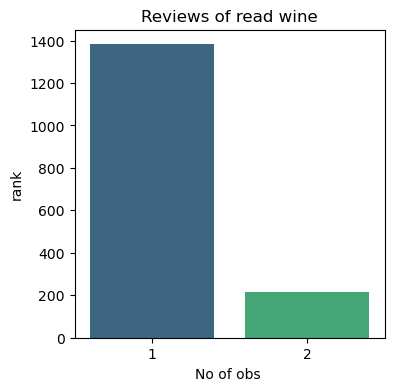

In [104]:
# Check class distribution reviews in a plot bar chart
# set figure size
plt.figure(figsize=(4, 4))

sns.countplot(data = wine_RF, x = 'Reviews', hue='Reviews', palette="viridis", dodge=False)
plt.title('Reviews of read wine')
plt.xlabel('No of obs ')
plt.ylabel('rank');

In [105]:
# Assuming wine_RF is your DataFrame
X = wine_RF.drop(["quality","Reviews"], axis=1)
y = wine_RF["Reviews"]

In [106]:
#lets us use stratify to accaount for the imb;anced data towards Bad reviews when using the theshold cut-off quuality.>=7. 
# To use stratify = y to ensure the training and testing set have the same proportion of classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [107]:
#Normalised data: let use the MinMaxScaler. In this case the normalizing the data will transform the data so that its distribution has a uniform range 
# Normalisation helps to avoid problems related to disparity in ranges across features since a small change in a feature might not affect the other
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled_N = scaler.fit_transform(X_train)
X_test_scaled_N = scaler.transform(X_test)

In [108]:
#Fit Radom Forest
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train_scaled_N,y_train)

# Prediction accuracy for Random Forest
y_pred_rf = rf_model.predict(X_test_scaled_N)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Calculate various metrics for Random Forest
accuracy_RF = accuracy_score(y_test, y_pred_rf)
precision_RF = precision_score(y_test, y_pred_rf, average='weighted')
recall_RF = recall_score(y_test, y_pred_rf, average='weighted')
f1_RF = f1_score(y_test, y_pred_rf, average='weighted')

# Print the results for Random Forest
print('Performance Metrics for Random Forest:')
print(f'Accuracy: {accuracy_RF * 100:.2f}%')
print(f'Precision: {precision_RF:.3f}')
print(f'Recall: {recall_RF:.3f}')
print(f'F1 Score: {f1_RF:.3f}')


Performance Metrics for Random Forest:
Accuracy: 93.75%
Precision: 0.935
Recall: 0.938
F1 Score: 0.932


In [109]:
# Check if overfitting occurs for random forest. Use cross_val_score function to estimate the expected accuracy of the model on out-of-training data
scores = cross_val_score(rf_model, X, y, cv=5)
print(scores.mean())

0.8624216300940439


Overfitting occurs when the model does very well on the training data while performs poorly on out-of-training data. To detect overfitting, we can compare the accuracy score on training set and the accuracy score on out-of-training set to see if a huge disparity exists

In [110]:
#Accuracy score on training data
y_pred_train = rf_model.predict(X_train_scaled_N)
print(metrics.accuracy_score(y_train, y_pred_train))


1.0


Although the Random Forest model mitigates some of the overfitting issues inherent to decision trees, the observed discrepancy between cross-validation scores and training accuracy suggests that the model is still experiencing a degree of overfitting. To further address this, we can fine-tune hyperparameters such as max_depth and n_estimators using GridSearchCV to improve model generalization and reduce overfitting

In [111]:
#Tune the Model’s Parameters
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


The following hyperparameters n_estimators (No of tress) and max_depth (depth of tress, branches)

To address overfitting, we can use RandomizedSearchCV to explore a broad range of values for hyperparameters such as n_estimators and max_depth. Specifically, we will restrict max_depth to values 1,5,7,10 (inclusive) and n_estimators to values between 100,200,300 (inclusive). This approach helps simplify the model and mitigate overfitting by systematically evaluating various combinations of these parameters.

In [123]:
random_grid = {'max_depth': [1,5,7,10],
'n_estimators': [50,100,200,250,300,350]}
rf_random = RandomizedSearchCV(rf_model,random_grid, n_iter = 20, cv = 5,random_state = 42)
rf_random.fit(X_train_scaled_N, y_train)
print(rf_random.best_params_)

{'n_estimators': 50, 'max_depth': 10}


In [113]:
#The hyperparametres selected are fit in the Rf model uisng GridSearchCV.  Different n-estimators between 50 to 150 and max_depth between 5 to 15 are tried
param_dist = {"max_depth":[5,6,7,8,9,10,11,12,13,14,15], "n_estimators":[50,60,70,80,90,100,110,130,140,150]}
rf_cv = GridSearchCV(rf_model, param_dist, cv=5)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_params_)

{'max_depth': 14, 'n_estimators': 70}


In [114]:
#Fit a new random forest model using the best parameters given above
rf_model_new = RandomForestClassifier(n_estimators = 70, max_depth =  14, random_state = 42)
rf_model_new.fit(X_train_scaled_N,y_train)

# Prediction accuracy for Random Forest
y_pred_rf_new = rf_model.predict(X_test_scaled_N)
acc_rf_new = accuracy_score(y_test, y_pred_rf_new)

# Calculate various metrics for Random Forest
accuracy_RF_new = accuracy_score(y_test, y_pred_rf_new)
precision_RF_new = precision_score(y_test, y_pred_rf_new, average='weighted')
recall_RF_new = recall_score(y_test, y_pred_rf_new, average='weighted')
f1_RF_new = f1_score(y_test, y_pred_rf_new, average='weighted')

# Print the results for Random Forest
print('Performance Metrics for Random Forest:')
print(f'Accuracy: {accuracy_RF_new * 100:.2f}%')
print(f'Precision: {precision_RF_new:.3f}')
print(f'Recall: {recall_RF_new:.3f}')
print(f'F1 Score: {f1_RF_new:.3f}')

Performance Metrics for Random Forest:
Accuracy: 93.75%
Precision: 0.935
Recall: 0.938
F1 Score: 0.932


Even after adjusting the n_estimators and max_depth hyperparameters, the Random Forest model's performance didn't see much improvement. However, by increasing n_estimators and lowering max_depth, we've managed to reduce the overfitting issue

In [115]:
#check the most imporatnt fetures that helps to classify Wines

                      importance
feature                         
alcohol                     0.18
sulphates                   0.11
volatile acidity            0.10
density                     0.10
citric acid                 0.08
total sulfur dioxide        0.08
fixed acidity               0.07
chlorides                   0.07
residual sugar              0.07
pH                          0.07
free sulfur dioxide         0.06


<Figure size 1200x800 with 0 Axes>

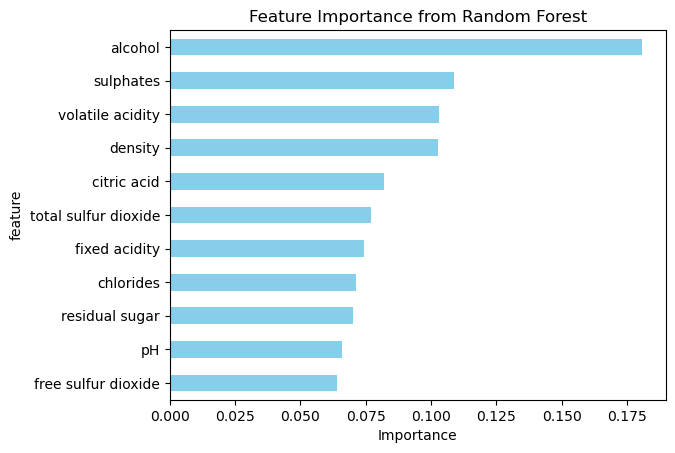

In [116]:
# Create a DataFrame for feature importances
rf_model_new_im = pd.DataFrame({
    'feature': X_train.columns,  # Use the original DataFrame's column names
    'importance': rf_model_new.feature_importances_
})

# Set the index to 'feature'
rf_model_new_im.set_index('feature', inplace=True)

# Sort the features by importance in descending order
rf_model_new_im.sort_values(by='importance', ascending=False, inplace=True)

# Display the top 5 important features with 8 decimal places
print(rf_model_new_im.head(12).round(8))

# Plot feature importances
plt.figure(figsize=(12, 8))  # Adjust the size as needed
rf_model_new_im.plot.barh(legend=False, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.show()

In simple terms, the top three factors that make a wine really good are alcohol content, low volatile acidity, and high sulphates. Good wines usually have higher alcohol levels, lower volatile acidity, and more sulphates. Now that we know these are the key traits, let’s compare the average alcohol levels between good wines and regular wines.

New predictions are created for several instances with different combinations of alcohol and sulphate levels, you can create a DataFrame with these instances and use the trained model to predict their Reviews values. Using a ramdom dataset

In [117]:
# Your new data (without the 'quality' column, assuming you want to predict this)

# New unseen data
new_data = pd.DataFrame({
    'fixed acidity': [7.40, 8.10, 7.50, 6.60, 9.30, 8.00, 7.70, 7.70],
    'volatile acidity': [0.70, 0.38, 0.52, 0.70, 0.32, 0.70, 0.63, 0.67],
    'citric acid': [0.00, 0.28, 0.11, 0.07, 0.57, 0.05, 0.08, 0.23],
    'residual sugar': [1.90, 2.10, 1.50, 1.60, 2.00, 1.90, 1.90, 2.10],
    'chlorides': [0.08, 0.07, 0.08, 0.08, 0.07, 0.07, 0.08, 0.09],
    'free sulfur dioxide': [11, 13, 11, 6, 27, 8, 15, 17],
    'total sulfur dioxide': [34, 30, 39, 15, 65, 19, 27, 96],
    'density': [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
    'pH': [3.51, 3.23, 3.42, 3.44, 3.28, 3.34, 3.32, 3.32],
    'sulphates': [0.56, 0.73, 0.58, 0.58, 0.79, 0.95, 0.54, 0.48],
    'alcohol': [9.40, 9.70, 9.60, 10.70, 10.70, 10.50, 9.50, 9.50]
})


In [118]:
# Normalize the new data using the previously fitted scaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_data_scaled = scaler.fit_transform(new_data)

In [119]:
# Make predictions using the trained RandomForest model
y_pred_new = rf_model_new.predict(new_data_scaled)

# Display predictions
print("Predictions for the new data:")
print(y_pred_new)

Predictions for the new data:
['1' '2' '1' '2' '2' '2' '1' '1']


In [120]:
#check the labels in the new data
true_labels_new = [1, 2, 1, 2, 1, 1, 1, 1]
true_labels_new = [str(label) for label in true_labels_new]

# Calculate performance metrics for new data
accuracy_new = accuracy_score(true_labels_new, y_pred_new)
precision_new = precision_score(true_labels_new, y_pred_new, average='weighted')
recall_new = recall_score(true_labels_new, y_pred_new, average='weighted')
f1_new = f1_score(true_labels_new, y_pred_new, average='weighted')

# Print the performance metrics
print('Performance Metrics for New Data:')
print(f'Accuracy: {accuracy_new * 100:.2f}%')
print(f'Precision: {precision_new:.3f}')
print(f'Recall: {recall_new:.3f}')
print(f'F1 Score: {f1_new:.3f}')

Performance Metrics for New Data:
Accuracy: 75.00%
Precision: 0.875
Recall: 0.750
F1 Score: 0.767


In [121]:
# it is a good result overall the ones misclasified where 

In [122]:
# Create a DataFrame for the new data with predictions
new_data_with_predictions = new_data.copy()
new_data_with_predictions['True Label'] = true_labels_new
new_data_with_predictions['Predicted Label'] = y_pred_new

# Filter to show only misclassified rows
misclassified_data = new_data_with_predictions[new_data_with_predictions['True Label'] != new_data_with_predictions['Predicted Label']]

# Print misclassified data
print("Misclassified Data:")
print(misclassified_data)

Misclassified Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4           9.30              0.32         0.57            2.00       0.07   
5           8.00              0.70         0.05            1.90       0.07   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
4                   27                    65     1.00 3.28       0.79   
5                    8                    19     1.00 3.34       0.95   

   alcohol True Label Predicted Label  
4    10.70          1               2  
5    10.50          1               2  


After comparing all performance results for SVM, K-NN , DT, RF  the model with the highest model performance results is RF n_estimators = 70, max_depth =  14, random_state = 42 for Binary classification.

### Sources

1.	https://medium.com/geekculture/generate-synthetic-dataset-with-the-synthetic-data-vault-sdv-26b564b8fe15
2.	https://towardsdatascience.com/a-review-of-synthetic-tabular-data-tools-and-models-d83b232aae25
3.	https://www.geeksforgeeks.org/wine-dataset/
4.	https://allysonf.medium.com/predict-red-wine-quality-with-svc-decision-tree-and-random-forest-24f83b5f3408
5.	https://colab.research.google.com/github/rasbt/machine-learning-book/blob/main/ch04/ch04.ipynb#scrollTo=q_VNSZzeOqtS
6.	https://medium.com/bitgrit-data-science-publication/10-best-practices-for-data-science-21a748a410e4
7.	https://www.shiksha.com/online-courses/articles/handle-imbalanced-data-in-a-classification-problem/
8.	https://towardsdatascience.com/working-with-highly-imbalanced-datasets-in-machine-learning-projects-c70c5f2a7b16
9.	https://www.whiteboxml.com/en/blog/the-definitive-guide-to-python-virtual-environments-with-conda
10.	https://towardsdatascience.com/how-to-set-up-anaconda-and-jupyter-notebook-the-right-way-de3b7623ea4a
11.	https://allysonf.medium.com/predict-red-wine-quality-with-svc-decision-tree-and-random-forest-24f83b5f3408
12.	https://github.com/Qudirah/ML_Case_Study
13.	https://github.com/rasbt/machine-learning-book/tree/main/ch05
14.	https://github.com/rasbt/machine-learning-book/tree/main/ch04
15.	https://github.com/rasbt/machine-learning-book/tree/main/ch06
16.	https://towardsdatascience.com/guide-to-classification-on-imbalanced-datasets-d6653aa5fa23
17.	https://github.com/Qudirah/ML_Case_Study
